## Текст задания
Вводная:
Трафовые пользователи - пользователи, привлеченные нами в результате рекламных кампаний, т.е. за каждого из них заплачено Х денег
Органические пользователи - пришли в проект сами, т.е. они для нас бесплатные
Есть подозрение, что часть органики приходит от купленного трафа (посредством внутренних виральных инструментов игры, word of mouth или какими-то другими способами).
Количество человек, пришедших с каждого пользователя будем условно называть "k-фактором".


Задача 1: посчитать k-фактор от трафовых пользователей
Задача 2: если k-фактор отличен от 0, посчитать “k-фактор” для денег - т.е. сколько дополнительно денег приходит на каждый потраченный доллар трафового пользователя от привлеченной трафом органики
Задача 3: творческая. Если что-то интересное придет в голову или будет найдена полезная закономерность в данных - это приветствуется.

Цель: правильно оценивать эффективность маркетинговых кампаний

Данные:
ms - канал привлечения (ORGANIC/UA)
cohort - дата привледения
user_cnt - количество новых пользователей
gross - сколько эти пользователи заплатили

Данные вымышлены, особых связей с реальными проектами искать не стоит.

На выходе интересно получить:
1. отчет в любом формате для презентации, pdf, ppt или что-то другое.
2. скрипт py или R по обработке данных и самому анализу



## Процедура
Я решила действовать с помощью линейной регрессии в обоих случаях, так как они линейно связаны, хоть и не распределены нормально. Предиктор - UA, ЗП - ORG. За k-фактор принимаю коэффициент уравнения линейной регрессии при предикторе.

И для count, и для gross, я решила создать по две модели: одну с полным набором данных, другую без выбросов. Как и ожидалось, модели без выбросов были более надёжными по ряду критериев, но в обоих случаях их MSE превышала MSE первых моделей, в которых учитывались выбросы. Так как в задачи входит более полно учесть k-фактор периода, чем просто спрогнозировать, я считаю, что имеет смысл взять именно их коэффициенты.

Так как линейная регрессия слишком проста для конкретных данных(несмотря на то, что зависимость между ними линейна), я хотела попробовать решить задачу с помощью чего-то более продвинутого, но не смогла привести ряд органики к стационарному виду ни с помощью логарифмирования, ни с помощью Бокса-Кокса, дифференцирования или сочетания этих операций.

## Результаты

Значения самих k-факторов:
- k-factor для количества пользоваетелей = 0.28

- k-factor для дохода = 0.36


Подробные результаты описаны здесь:
https://docs.google.com/presentation/d/1r8_OgjnEs0tKCX5e6fCrEuSqFpg5mWPOAjhRxFPmU80/edit#slide=id.g1236e12d13b_0_195

Далее представлен сам скрипт решения с комментариями.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from scipy import stats
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf
import sklearn
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#задаём стиль графикам
sns.set (
    font_scale =2,
    style = 'whitegrid',
    rc= {'figure.figsize': (30,7)}
)

In [3]:
df = pd.read_csv('C:/Users/cbata/test_cases/traf/test_data.csv')

### Обзорная часть

Смотрю дф

In [4]:
df

,ms,cohort,user_cnt,gross
0,ORGANIC,2016-01-01,3676,1510
1,UA,2016-01-01,6061,686
2,UA,2016-01-02,6542,1179
3,ORGANIC,2016-01-02,3875,565
4,ORGANIC,2016-01-03,3699,425
...,...,...,...,...
1457,UA,2017-12-29,4180,65
1458,ORGANIC,2017-12-30,5651,17
1459,UA,2017-12-30,4291,13
1460,UA,2017-12-31,3743,25


In [5]:
df.dtypes

ms          object
cohort      object
user_cnt     int64
gross        int64
dtype: object

In [6]:
df['cohort'] = pd.to_datetime(df['cohort'])

In [7]:
df.isna().sum()

ms          0
cohort      0
user_cnt    0
gross       0
dtype: int64

In [8]:
df.describe()

,user_cnt,gross
count,1462.000000,1462.000000
mean,6201.270862,516.803010
std,4058.405863,449.168427
min,2085.000000,12.000000
25%,3763.000000,229.000000
50%,4723.000000,418.500000
75%,7253.250000,698.750000
max,41110.000000,8214.000000


In [151]:
print('Суммарное количество пользователей за 2 года = ',df.user_cnt.sum())

Суммарное количество пользователей за 2 года =  9066258


In [150]:
print('Суммарный доход от пользователей за 2 года = ',df.gross.sum())

Суммарный доход от пользователей за 2 года =  755566


In [ ]:
df_full.

Хочу посмотреть распределения org/ua, чтобы в целом понять, что происходило

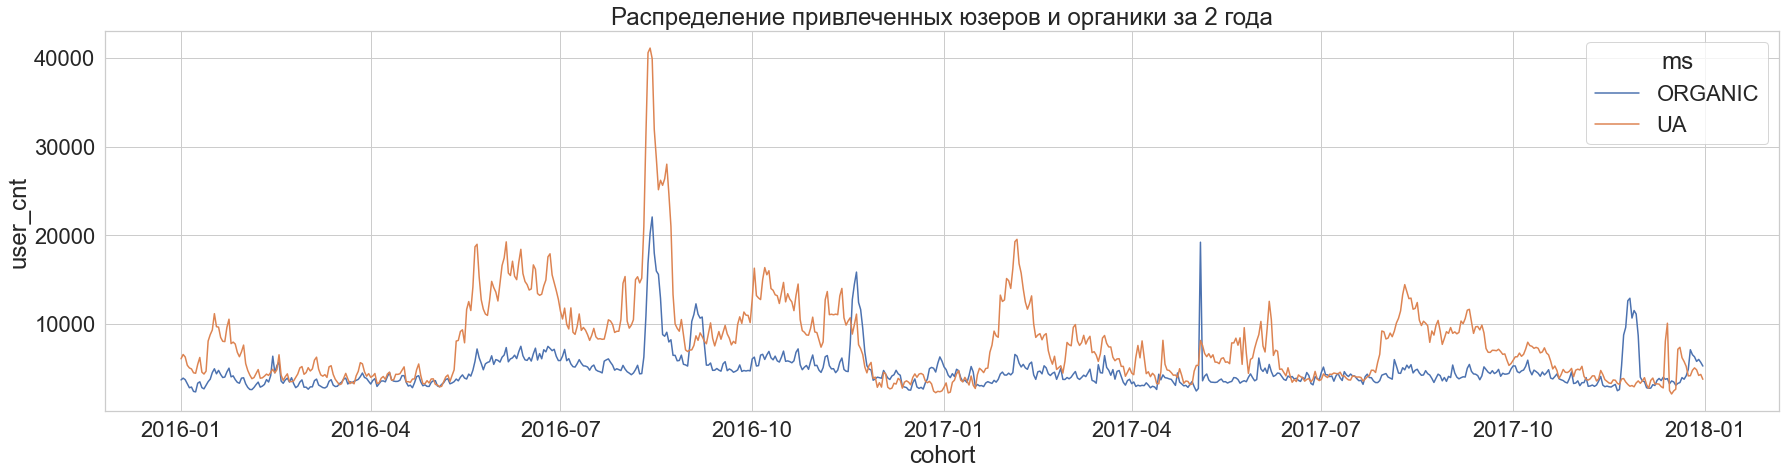

In [9]:
sns.lineplot(data =df, x= 'cohort', hue = 'ms', y= 'user_cnt')
plt.title("Распределение привлеченных юзеров и органики за 2 года")
plt.savefig('Распределение привлеченных юзеров и органики за 2 года.png')

В целом имеет смысл: органика двигается вместе с оплаченным трафиком, есть и пиковые значения органики, видимо, в какой-то момент игра становилась особенно виральной по тем или иным причинам.
А с доходами что?

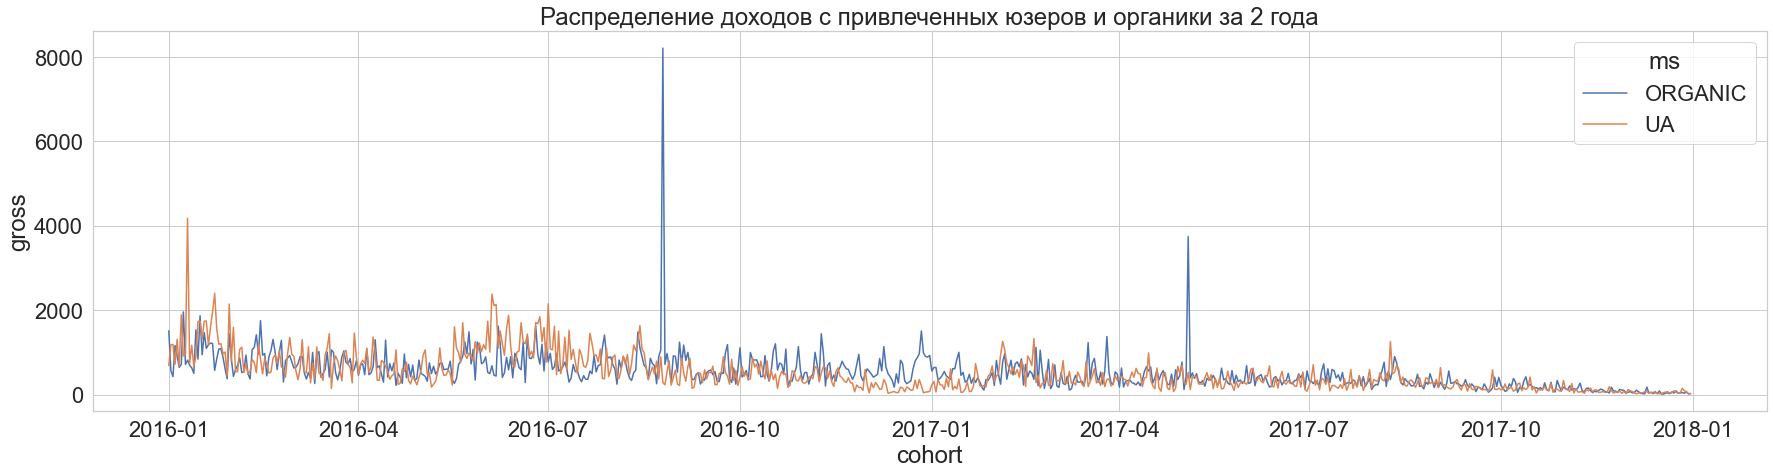

In [10]:
sns.lineplot(data =df, x= 'cohort', hue = 'ms', y= 'gross')
plt.title("Распределение доходов с привлеченных юзеров и органики за 2 года")
plt.savefig('Распределение доходов с привлеченных юзеров и органики за 2 года.png')

Судя по всему, органика даёт больше денег, чем привлечённые...
Хочется посмотреть средние.

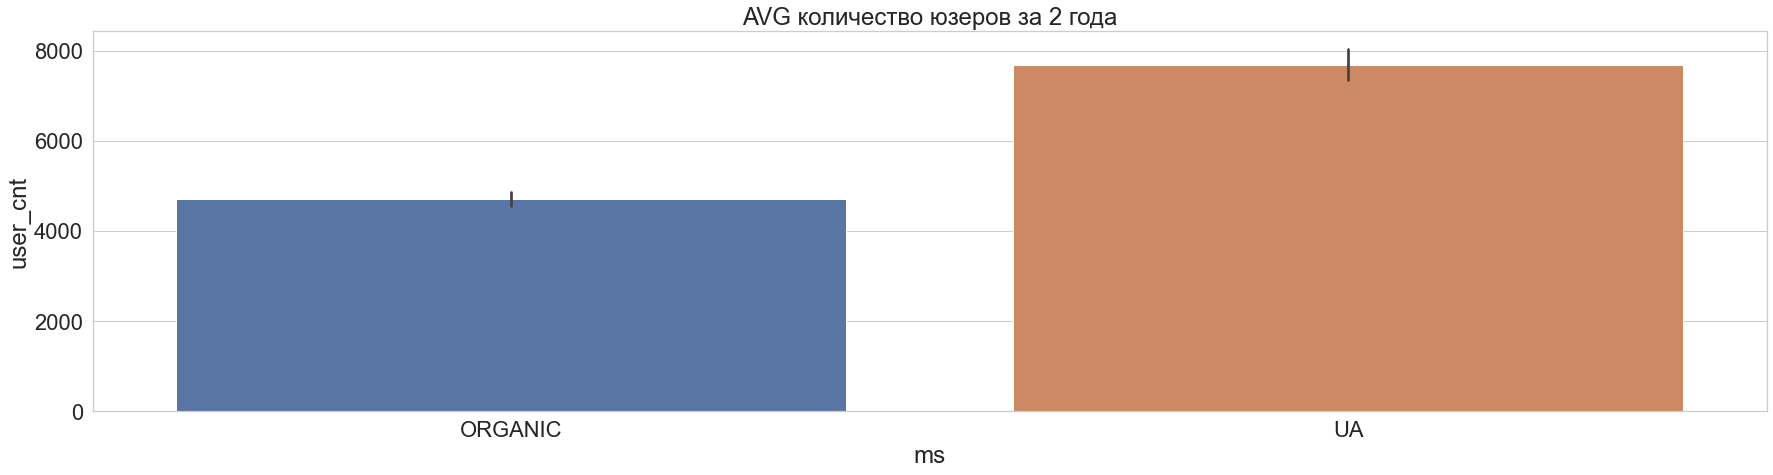

In [11]:
sns.barplot(data = df, x = 'ms', y='user_cnt', estimator= np.mean )
plt.title("AVG количество юзеров за 2 года")
plt.savefig('AVG количество юзеров за 2 года.png')

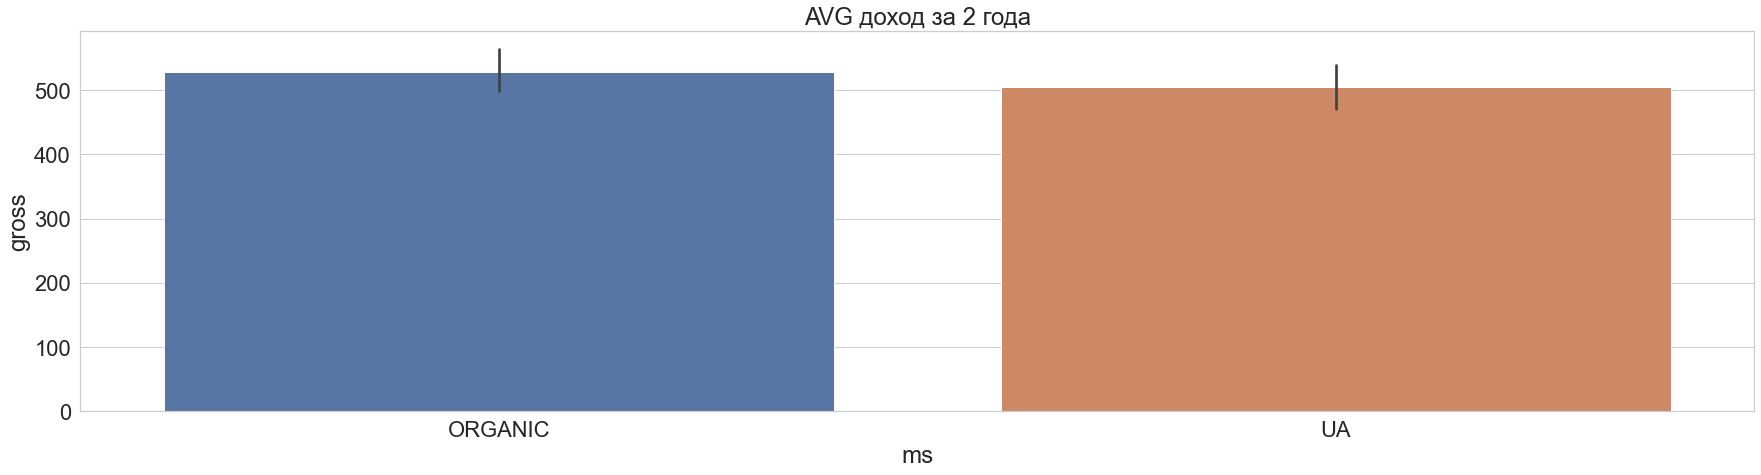

In [12]:
sns.barplot(data = df, x = 'ms', y='gross', estimator= np.mean )
plt.title("AVG доход за 2 года")
plt.savefig('AVG доход за 2 года.png')

Органики количественно меньше, а доход с органики статистически значимо не отличается от дохода UA. Далее я считаю такие же чисто обзрные данные

In [143]:
df_full.sum()

abs(df_full.sum()[1] - df_full.sum()[0])
print('Разница между количеством UA и органики = ', abs(df_full.sum()[1] - df_full.sum()[0]))

round(df_full.sum()[1] /df_full.sum()[0],2)
print('Соотношение между UA и органикой(UA/ORG)= ', round(df_full.sum()[1] /df_full.sum()[0],2))

abs(df_full.sum()[2] - df_full.sum()[3])
print('Разница между доходом от UA и органики = ', abs(df_full.sum()[2] - df_full.sum()[3]), '$')

round(df_full.sum()[2] /df_full.sum()[3],2)
print('Соотношение между доходов от UA и органики(UA/ORG)= ', round(df_full.sum()[2] /df_full.sum()[3],2))

Разница между количеством UA и органики =  2183952
Соотношение между UA и органикой(UA/ORG)=  1.63
Разница между доходом от UA и органики =  17480 $
Соотношение между доходов от UA и органики(UA/ORG)=  1.05


Теперь я перегруппирую таблицу для того, чтобы было удобнее работать:

In [13]:
df_cohort_users = df.pivot(index = 'cohort', columns = 'ms', values = 'user_cnt').reset_index()
df_cohort_users.head(2)

ms,cohort,ORGANIC,UA
0,2016-01-01,3676,6061
1,2016-01-02,3875,6542


In [14]:
df_count = df.pivot(index = 'cohort', columns = 'ms', values = ['user_cnt', 'gross'])['user_cnt'].reset_index().rename(columns = {
    'ORGANIC':'ORGANIC_user_cnt',
    'UA':'UA_user_cnt'})

In [15]:
df_gross = df.pivot(index = 'cohort', columns = 'ms', values = ['user_cnt', 'gross'])['gross'].reset_index().rename(columns = {
    'ORGANIC':'ORGANIC_gross',
    'UA':'UA_gross'})

In [16]:
df_full = df_count.merge(df_gross, left_index = True, right_index = True).drop('cohort_y', axis = 1).rename(columns = {'cohort_x': 'cohort'})

In [17]:
df_full.head()

ms,cohort,ORGANIC_user_cnt,UA_user_cnt,ORGANIC_gross,UA_gross
0,2016-01-01,3676,6061,1510,686
1,2016-01-02,3875,6542,565,1179
2,2016-01-03,3699,6260,425,1186
3,2016-01-04,3237,5330,1161,718
4,2016-01-05,2792,5027,917,1308


## Рассчёт k-фактора для количества пользователей

Так как для оценки k-фактора нужна регрессия, где предиктором будет количество UA юзеров, а ЗП - органика, нужно предварительно посмотреть на их распределения, а также на скаттерплот. Коррелируют ли эти переменные?

<AxesSubplot:xlabel='ORGANIC_user_cnt', ylabel='UA_user_cnt'>

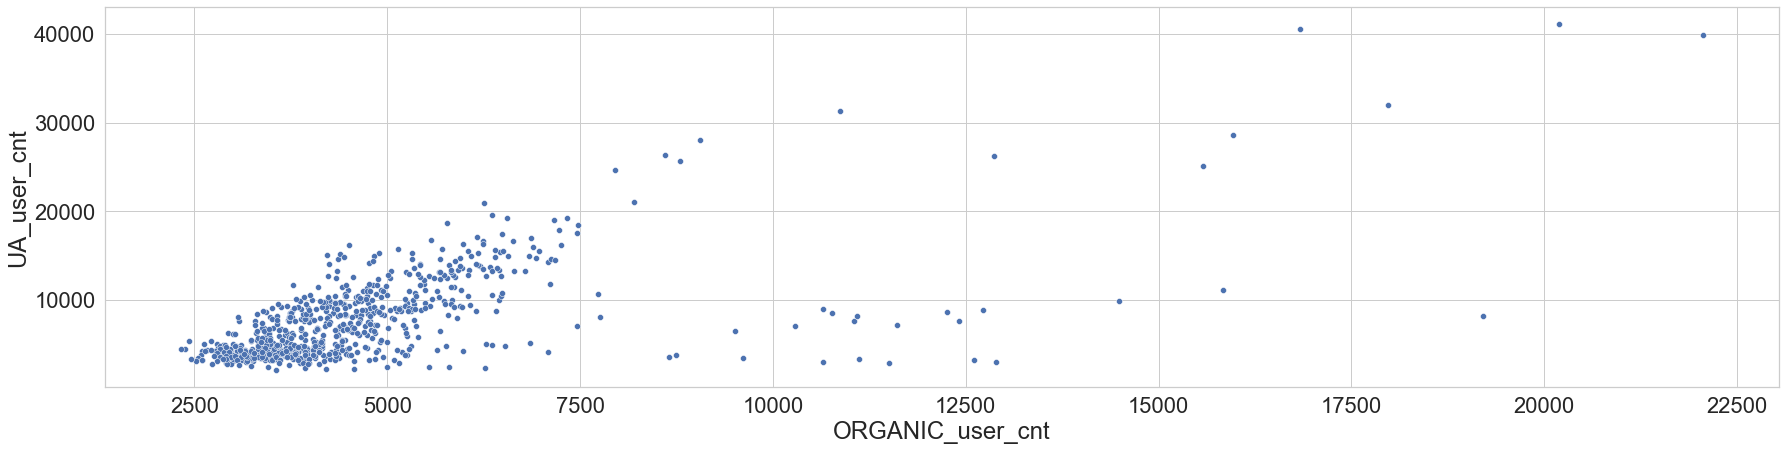

In [18]:
sns.scatterplot(data = df_full, x = df_full.ORGANIC_user_cnt, y = df_full.UA_user_cnt)

Как видим, существует положительная корреляция между органикой и UA.  Правда, здесь есть выбросы: далее я построю ещё одну модель, чтобы сравнить их.

<AxesSubplot:>

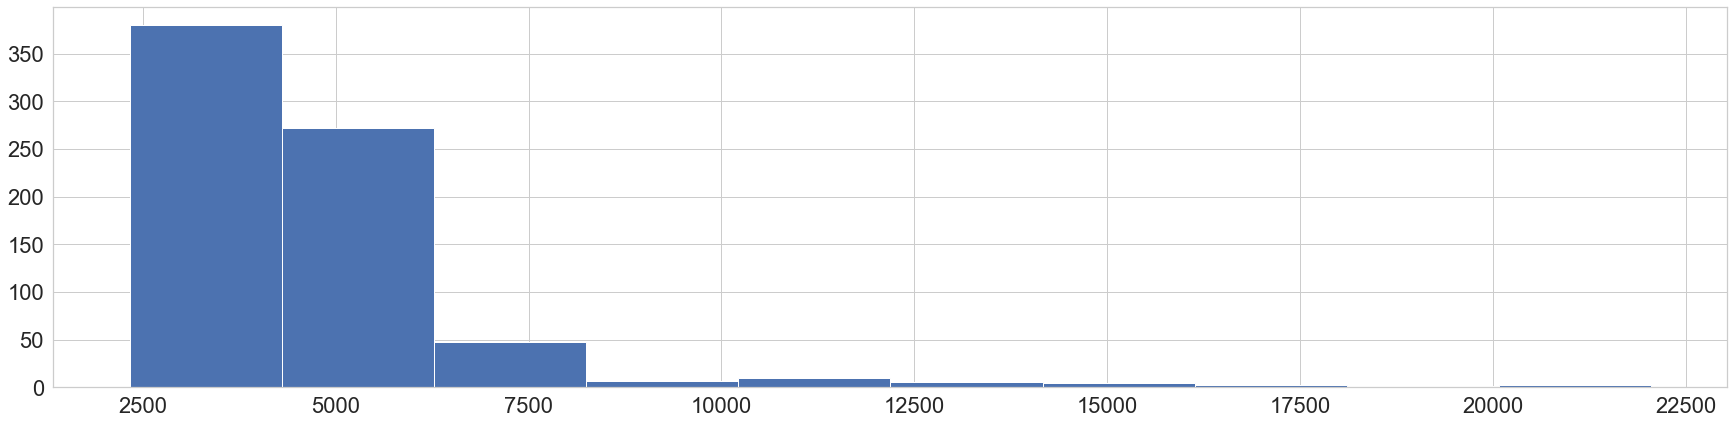

In [19]:
df_full.ORGANIC_user_cnt.hist()

<AxesSubplot:>

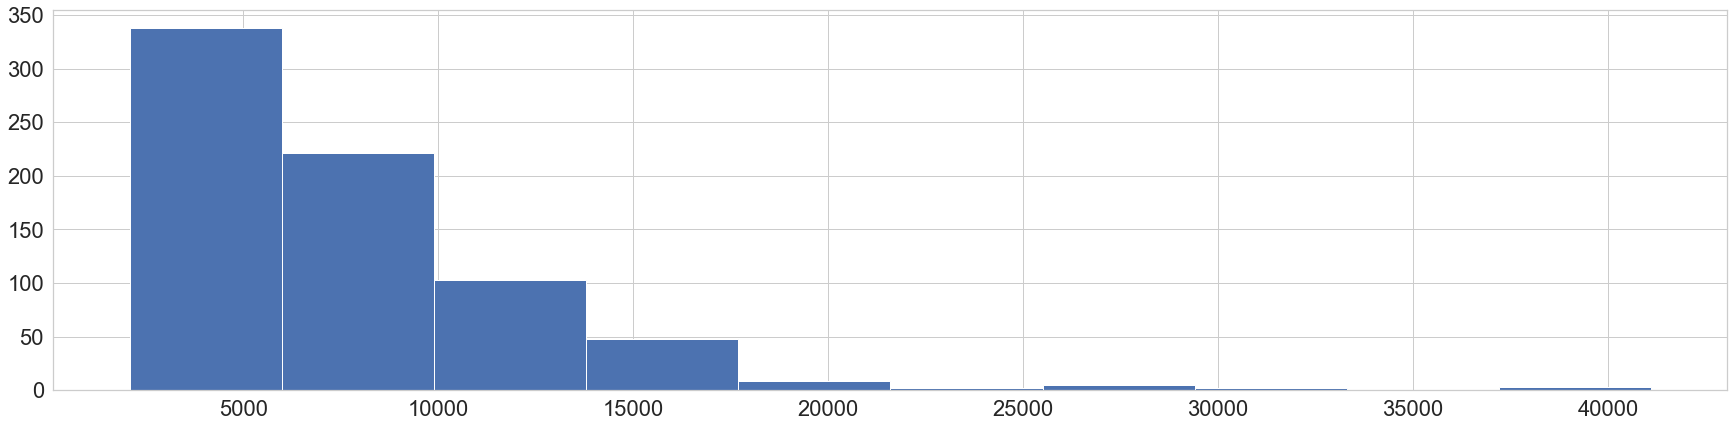

In [20]:
df_full.UA_user_cnt.hist()

Обе переменные не распределены нормально, но часто этим моментом пренебергают: более важным критерием считается нормальное распределение остатков самой модели.

Построим саму модель:

### Модель 1

In [21]:
results= smf.ols('ORGANIC_user_cnt ~ UA_user_cnt', df_full).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       ORGANIC_user_cnt   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     494.2
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           5.51e-84
Time:                        13:44:25   Log-Likelihood:                -6457.7
No. Observations:                 731   AIC:                         1.292e+04
Df Residuals:                     729   BIC:                         1.293e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2551.7328    114.839     22.220      

Что здесь видно:  модель покрывает 40% дисперсии, p <0.001. Согласно этой модели, k фактор равен 0.28. Значения Харке-Бера очень высоки, как и Омнибус: вероятнее всего, остатки не распределны нормально. Дурбин-Ватсон в пределах нормы. 

Смотрю, нормально ли распределение остатков:

<AxesSubplot:>

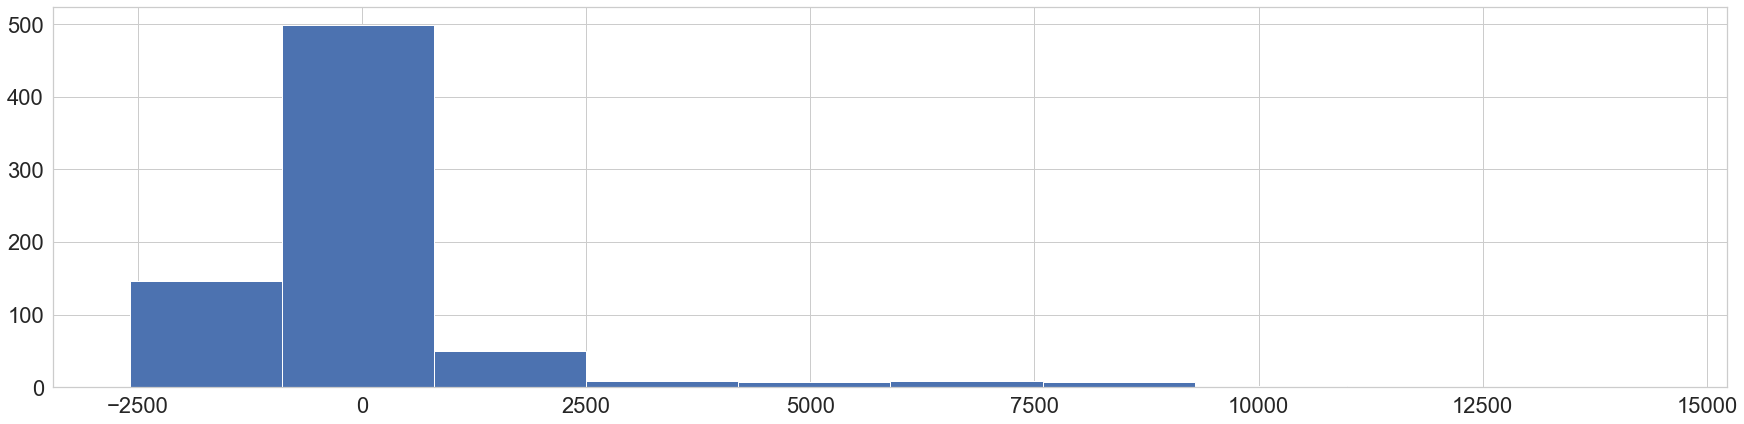

In [22]:
results.resid.hist()

Да, остатки не нормальны. Это сильно влияет на надёжность модели.

График линии регресии, величина MSE:

In [23]:
#тестовые значения переменных
x_test = df_full.UA_user_cnt 
y_test = df_full.ORGANIC_user_cnt

In [24]:
# Create linear regression object
regr1 = linear_model.LinearRegression()

# Train the model using the training sets
regr1.fit(df_full.UA_user_cnt.values.reshape(-1, 1), df_full.ORGANIC_user_cnt.values.reshape(-1, 1))

# Make predictions using the testing set
ORG_y_pred = regr1.predict(df_full.UA_user_cnt.values.reshape(-1, 1))

Coefficients: 
 [[0.28014345]]
[2551.7327775]
Mean squared error: 2758581.70
Coefficient of determination: 0.40


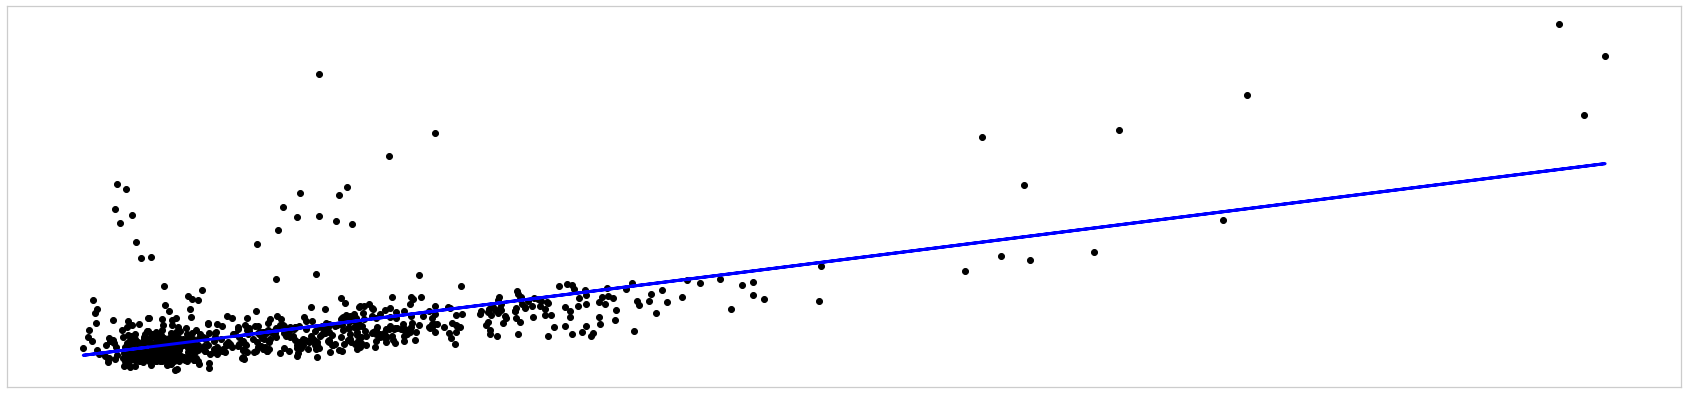

In [25]:
# The coefficients
print("Coefficients: \n", regr1.coef_)
# The intercept
print(regr1.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, ORG_y_pred))
# The coefficient of determination
print("Coefficient of determination: %.2f" % r2_score(y_test, ORG_y_pred))

# Plot outputs
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, ORG_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

График сравнения предсказанной и реальной органики

In [26]:
df_pred_plot = df_full[['cohort', 'ORGANIC_user_cnt', 'UA_user_cnt']] # дф для графика сравнения

In [27]:
df_pred_plot['pred_ORG'] = regr1.intercept_ + df_pred_plot.UA_user_cnt * regr1.coef_[0] # добавляю значения предсказанной органики

<ipython-input-27-f4a1a3cabdfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_plot['pred_ORG'] = regr1.intercept_ + df_pred_plot.UA_user_cnt * regr1.coef_[0] # добавляю значения предсказанной органики


Text(0.5, 1.0, 'График сравнения предсказанной и реальной органики')

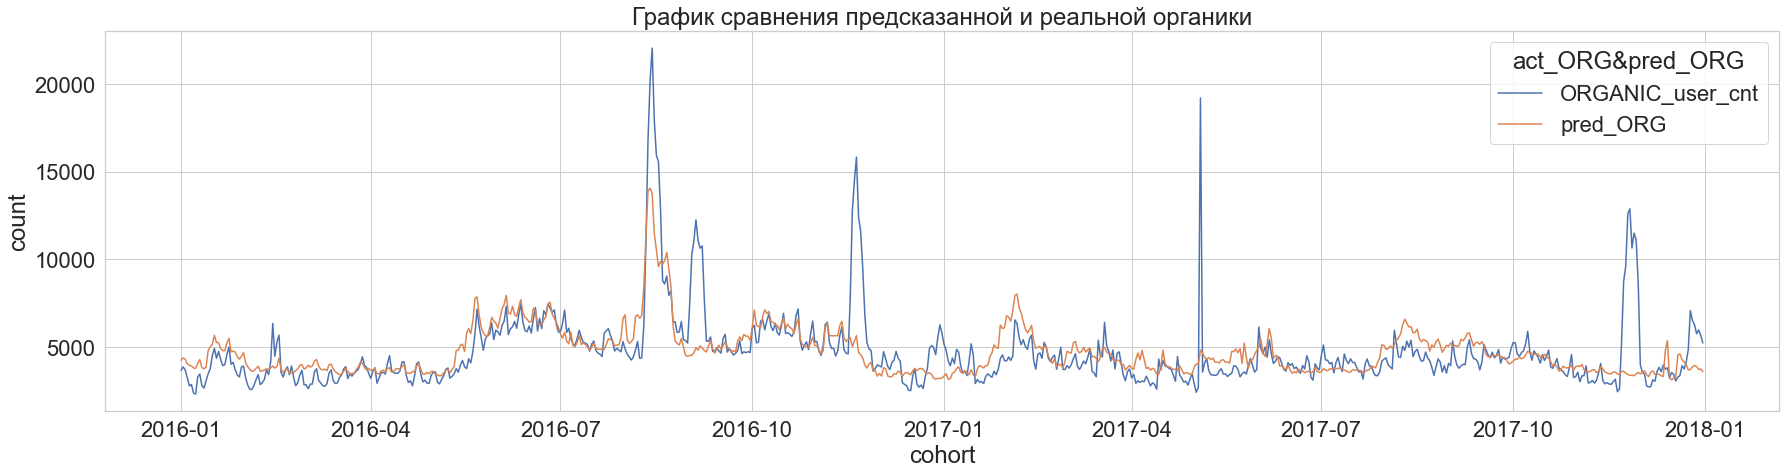

In [28]:
sns.lineplot(data =df_pred_plot.drop(columns = ['UA_user_cnt']) #дропаю UA, так как они не нужны на этом графике
             .melt("cohort",var_name="act_ORG&pred_ORG",value_name="count"), x= 'cohort', y= 'count', hue ='act_ORG&pred_ORG' ) #преобразование для sns
plt.title("График сравнения предсказанной и реальной органики")

### Вывод по модели 1

Такая простая модель покрывает 40% дисперсии, p <0.001. Согласно этой модели, k фактор равен 0.28. Но модель нельзя считать надёжной, так как остатки не распределены нормально. MSE =2758581.70, это пригодится для сравнения с другой моделью.

Далее я хочу построить то же самое, но на данных, в которых нет таких серьёзных выбросов.

In [29]:
df_full_clean = df_full.query('ORGANIC_user_cnt< 7500')

<AxesSubplot:xlabel='ORGANIC_user_cnt', ylabel='UA_user_cnt'>

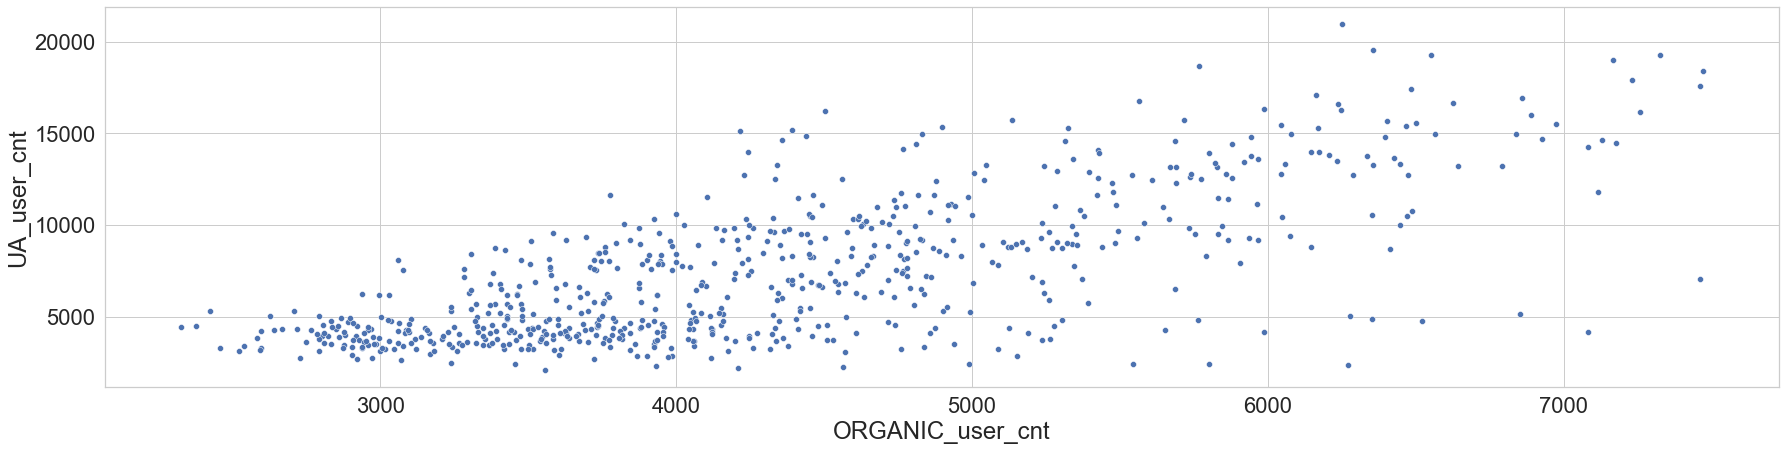

In [30]:
sns.scatterplot(data = df_full_clean, x = df_full_clean.ORGANIC_user_cnt, y = df_full_clean.UA_user_cnt)

Видно, что есть ещё выбросы в нижней части графика. Их я тоже уберу:

In [31]:
df_full_clean = df_full_clean.query('~((ORGANIC_user_cnt< 7500 and ORGANIC_user_cnt> 4500) and UA_user_cnt <5000)')

<AxesSubplot:xlabel='ORGANIC_user_cnt', ylabel='UA_user_cnt'>

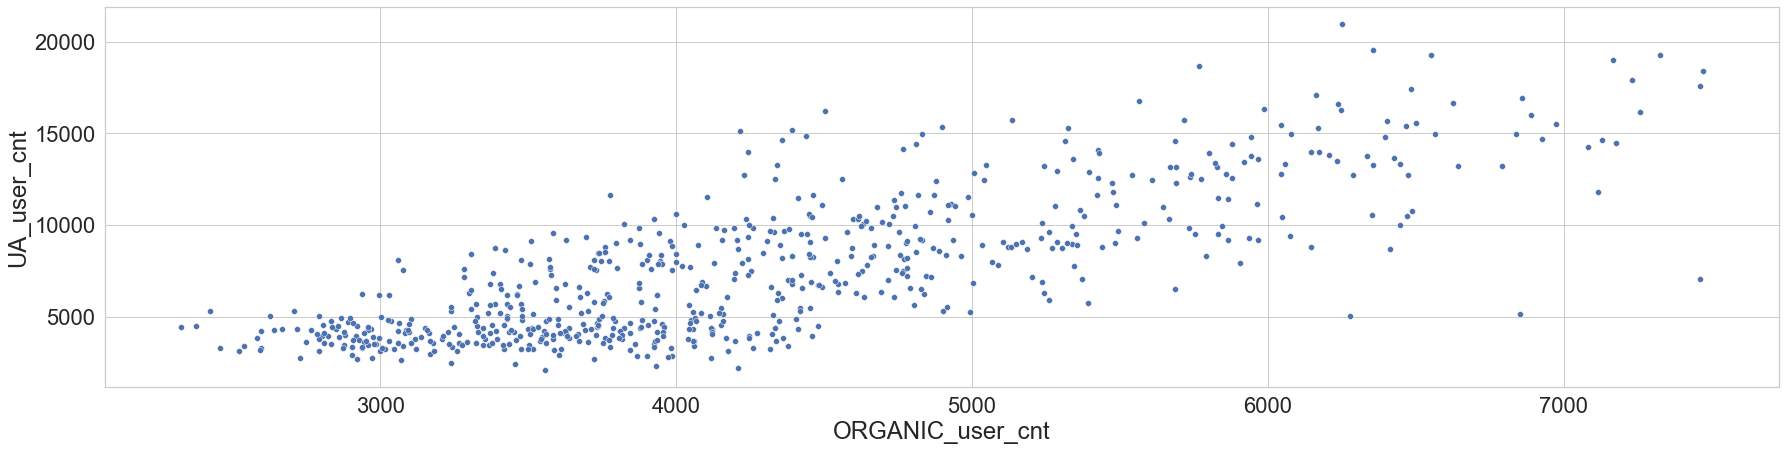

In [32]:
sns.scatterplot(data = df_full_clean, x = df_full_clean.ORGANIC_user_cnt, y = df_full_clean.UA_user_cnt)

Этот график выглядит однороднее. Применяю линейную регрессию, чтобы посмотреть, какой коэффициент будет в этом случае:

In [33]:
results2= smf.ols('ORGANIC_user_cnt ~ UA_user_cnt', df_full_clean).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:       ORGANIC_user_cnt   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     1109.
Date:                Mon, 18 Apr 2022   Prob (F-statistic):          1.78e-143
Time:                        13:44:28   Log-Likelihood:                -5239.7
No. Observations:                 663   AIC:                         1.048e+04
Df Residuals:                     661   BIC:                         1.049e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2617.7555     55.972     46.769      

Что здесь видно:  модель покрывает 62% дисперсии, p <0.001. Ожидаемо коэффициент детерминации вырос: данные были почище. Согласно этой модели, k фактор равен 0.22. Значения Харке-Бера и Омнибус намного меньше, чем у прошлой модели, что тоже логично. Дурбин-Ватсон в пределах нормы. 

Нормально ли распределны остатки?

<AxesSubplot:>

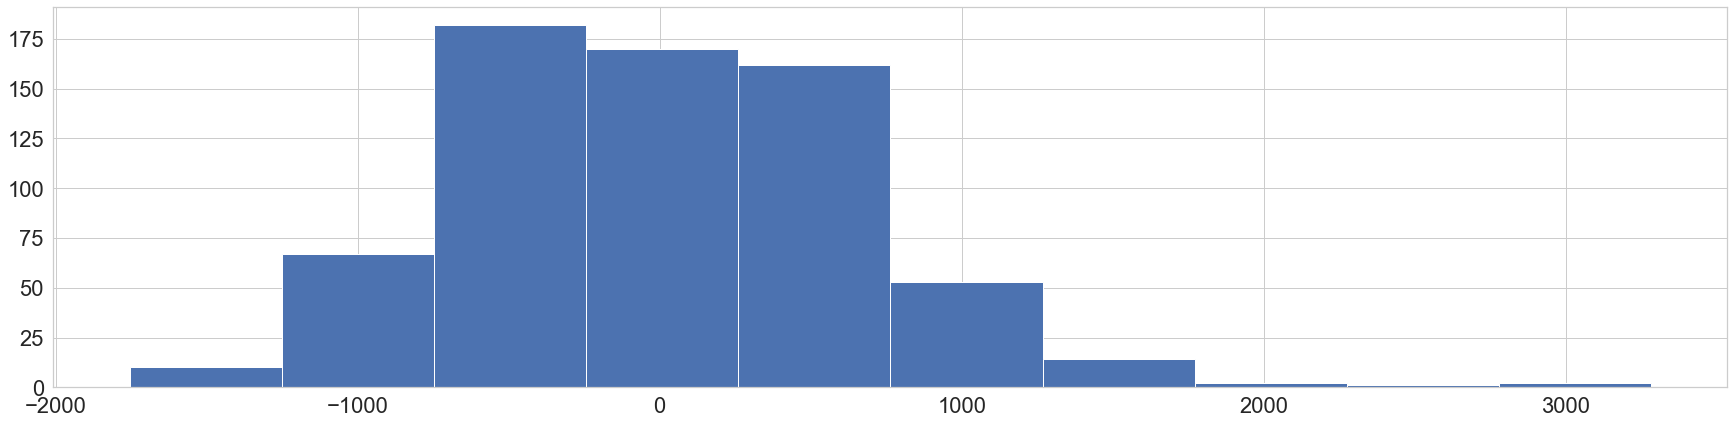

In [34]:
results2.resid.hist()

Выглядит лучше, чем у предыдущей модели: похоже на нормальное распределение. 

In [35]:
# Create linear regression object
regr2 = linear_model.LinearRegression()

# Train the model using the training sets
regr2.fit(df_full_clean.UA_user_cnt.values.reshape(-1, 1), df_full_clean.ORGANIC_user_cnt.values.reshape(-1, 1))

# Make predictions using the testing set
ORG_y_pred_model2 = regr2.predict(df_full.UA_user_cnt.values.reshape(-1, 1)) #использую полные данные

Прежде чем рисовать график, можно сразу проверить, меньше ли MSE у модели 2, чем у первой?

In [36]:
mean_squared_error(y_test, ORG_y_pred_model2) < mean_squared_error(y_test, ORG_y_pred)

False

MSE здесь больше, чем MSE у первой модели. Дальнейшего обсуждения модели не требуется.

### Вывод по модели 2:

Что здесь видно:  модель покрывает 62% дисперсии, p <0.001. Ожидаемо коэффициент детерминации вырос: данные были почище. Согласно этой модели, k фактор равен 0.22. Значения Харке-Бера и Омнибус намного меньше, чем у прошлой модели, что тоже логично. Дурбин-Ватсон в пределах нормы. 
Так как эта модель была просчитана на основе очищенной выборки, у неё меньше нарушений нормальности, но предсказывает она хуже.

## Общий вывод по k-фактору для количества пользователей
Так как модель 1 имеет меньшую MSE, принимаем её коэффициент. k-фактор = 0.28

## Рассчёт k-фактора для дохода

В этом блоке процедура будет аналогичной той, что в блоке рассчёта k-фактора для количества пользователей.

Сначала построим скэтерплот для доходов от органики и доходов от UA.

<AxesSubplot:xlabel='ORGANIC_gross', ylabel='UA_gross'>

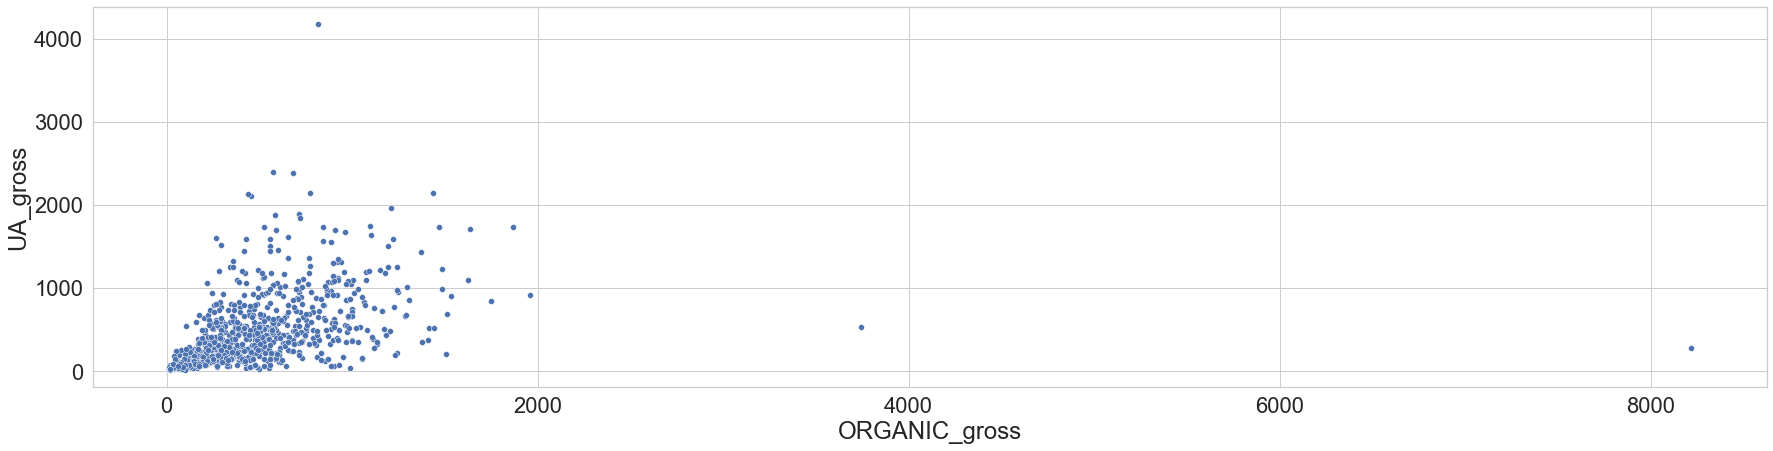

In [37]:
sns.scatterplot(data = df_full, x = df_full.ORGANIC_gross, y = df_full.UA_gross)

Видна линейная взаимосвязь между признаками. Какой формы их распределения?

<AxesSubplot:>

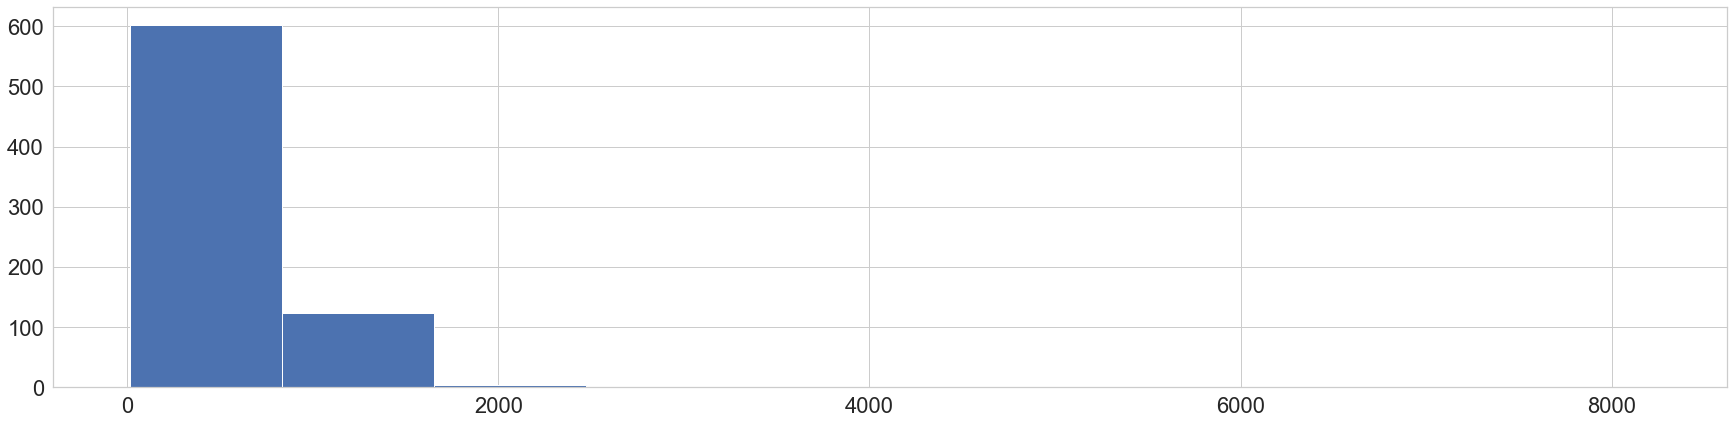

In [38]:
df_full.ORGANIC_gross.hist()

<AxesSubplot:>

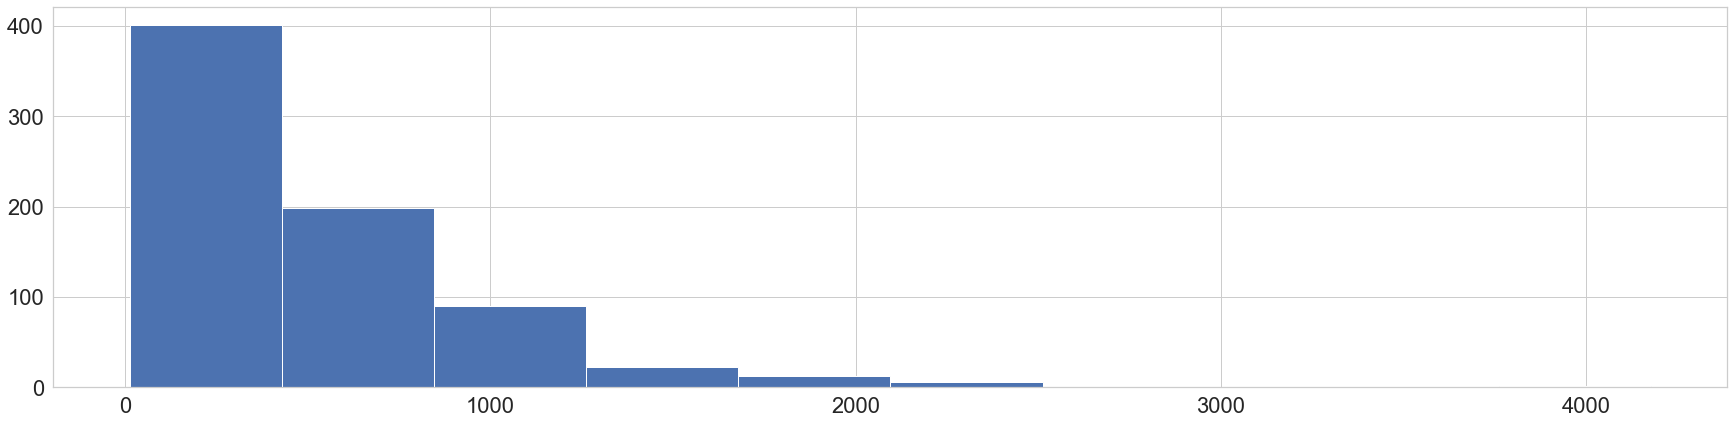

In [39]:
df_full.UA_gross.hist()

Распределения той же формы, что и количество пользователей. Строю модель.

In [40]:
results_org_model1= smf.ols('ORGANIC_gross ~ UA_gross', df_full).fit()
print(results_org_model1.summary())

                            OLS Regression Results                            
Dep. Variable:          ORGANIC_gross   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     101.7
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           1.79e-22
Time:                        13:44:29   Log-Likelihood:                -5463.3
No. Observations:                 731   AIC:                         1.093e+04
Df Residuals:                     729   BIC:                         1.094e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    347.2995     23.936     14.510      0.0

Модель покрывает лишь 12% дисперсии признака, p < 0.001. Коэффициент, он же k-фактор, равен 0.35. Дурбин-Ватсон в пределах нормы, Харке-Бера высок, распределение остатков не нормально.

Построим график линии, MSE.

In [41]:
#тестовые значения переменных
x_test_gross = df_full.UA_gross 
y_test_gross = df_full.ORGANIC_gross

In [42]:
# Create linear regression object
regr1_gross = linear_model.LinearRegression()

# Train the model using the training sets
regr1_gross.fit(df_full.UA_gross.values.reshape(-1, 1), df_full.ORGANIC_gross.values.reshape(-1, 1))

# Make predictions using the testing set
ORG_gross_pred = regr1_gross.predict(x_test_gross.values.reshape(-1, 1))

Coefficients: 
 [[0.35943522]]
[347.29951692]
Mean squared error: 181583.47
Coefficient of determination: 0.12


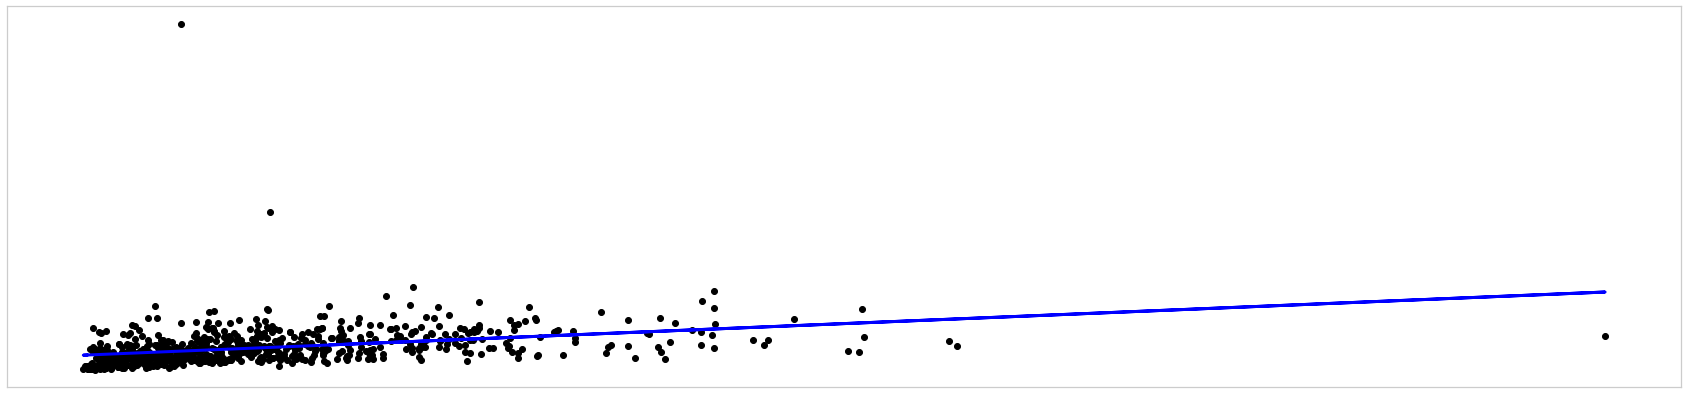

In [43]:
# The coefficients
print("Coefficients: \n", regr1_gross.coef_)
# The intercept
print(regr1_gross.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_gross, ORG_gross_pred))
# The coefficient of determination
print("Coefficient of determination: %.2f" % r2_score(y_test_gross, ORG_gross_pred))

# Plot outputs
plt.scatter(x_test_gross, y_test_gross, color="black")
plt.plot(x_test_gross, ORG_gross_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

График сравнения предсказанной и реальной gross

In [44]:
df_gross_pred_plot = df_full[['cohort', 'ORGANIC_gross', 'UA_gross']] # дф для графика сравнения

In [45]:
df_gross_pred_plot['pred_gross_ORG'] = regr1_gross.intercept_ +  df_gross_pred_plot.UA_gross * regr1_gross.coef_[0] # добавляю значения предсказанной gross органики

<ipython-input-45-9157ebfcca2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gross_pred_plot['pred_gross_ORG'] = regr1_gross.intercept_ +  df_gross_pred_plot.UA_gross * regr1_gross.coef_[0] # добавляю значения предсказанной gross органики


Text(0.5, 1.0, 'График сравнения предсказанной и реальной органики, модель 1')

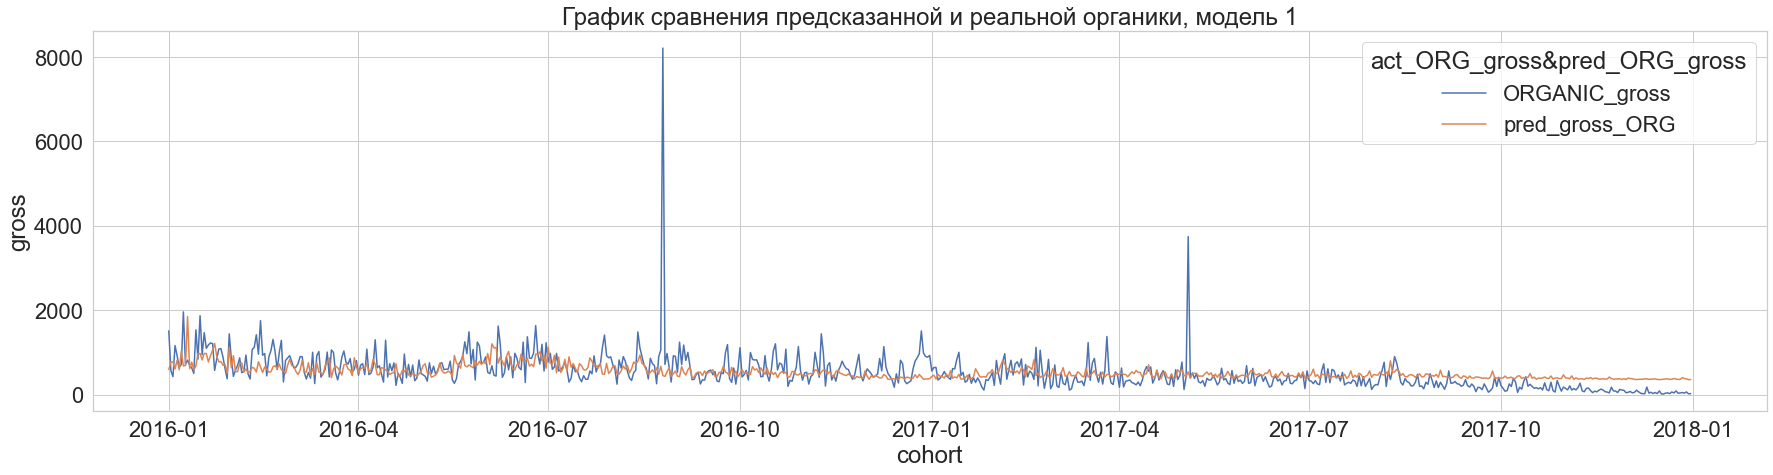

In [46]:
sns.lineplot(data =df_gross_pred_plot.drop(columns = ['UA_gross']) #дропаю UA, так как они не нужны на этом графике
             .melt("cohort",var_name="act_ORG_gross&pred_ORG_gross",value_name="gross"), x= 'cohort', y= 'gross', hue ='act_ORG_gross&pred_ORG_gross' ) #преобразование для sns
plt.title("График сравнения предсказанной и реальной органики, модель 1")

### Вывод по модели 1 для gross

Модель покрывает лишь 12% дисперсии признака, p < 0.001. Коэффициент, он же k-фактор, равен 0.35. Дурбин-Ватсон в пределах нормы, Харке-Бера высок, распределение остатков не нормально.
MSE = 181583.47
По графику видно, что модель очень слабо предсказывает настоящие значения. Стоит попробовать построить модель с исключением сильных выбросов.

### Модель 2 для gross

Ещё раз посмотрим на модель скатерплот UA_gross/ ORG_gross

<AxesSubplot:xlabel='ORGANIC_gross', ylabel='UA_gross'>

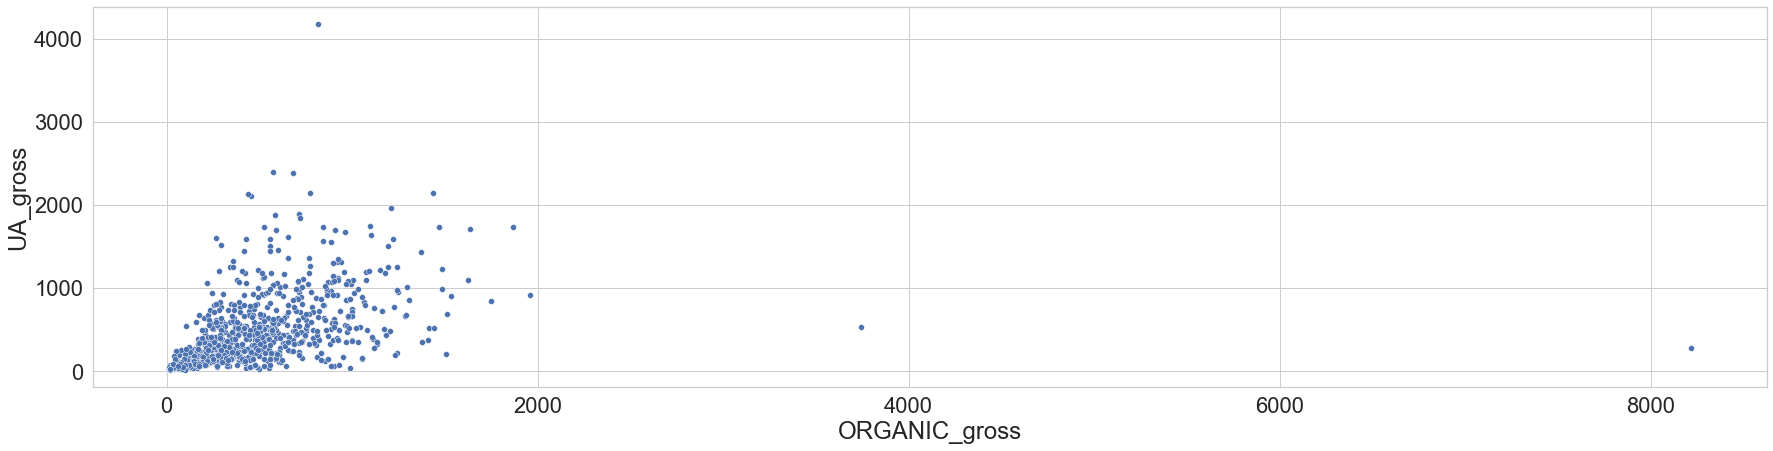

In [47]:
sns.scatterplot(data = df_full, x = df_full.ORGANIC_gross, y = df_full.UA_gross)

Видны три заметных выброса. Формирую датасет без них:

In [48]:
df_gross_clean = df_full.query('~((ORGANIC_gross < 2000 and UA_gross >3000) or (ORGANIC_gross > 2000 and UA_gross <1000))')

In [49]:
df_gross_clean

ms,cohort,ORGANIC_user_cnt,UA_user_cnt,ORGANIC_gross,UA_gross
0,2016-01-01,3676,6061,1510,686
1,2016-01-02,3875,6542,565,1179
2,2016-01-03,3699,6260,425,1186
3,2016-01-04,3237,5330,1161,718
4,2016-01-05,2792,5027,917,1308
...,...,...,...,...,...
726,2017-12-27,6276,5032,46,146
727,2017-12-28,5763,4809,32,89
728,2017-12-29,5987,4180,61,65
729,2017-12-30,5651,4291,17,13


<AxesSubplot:xlabel='ORGANIC_gross', ylabel='UA_gross'>

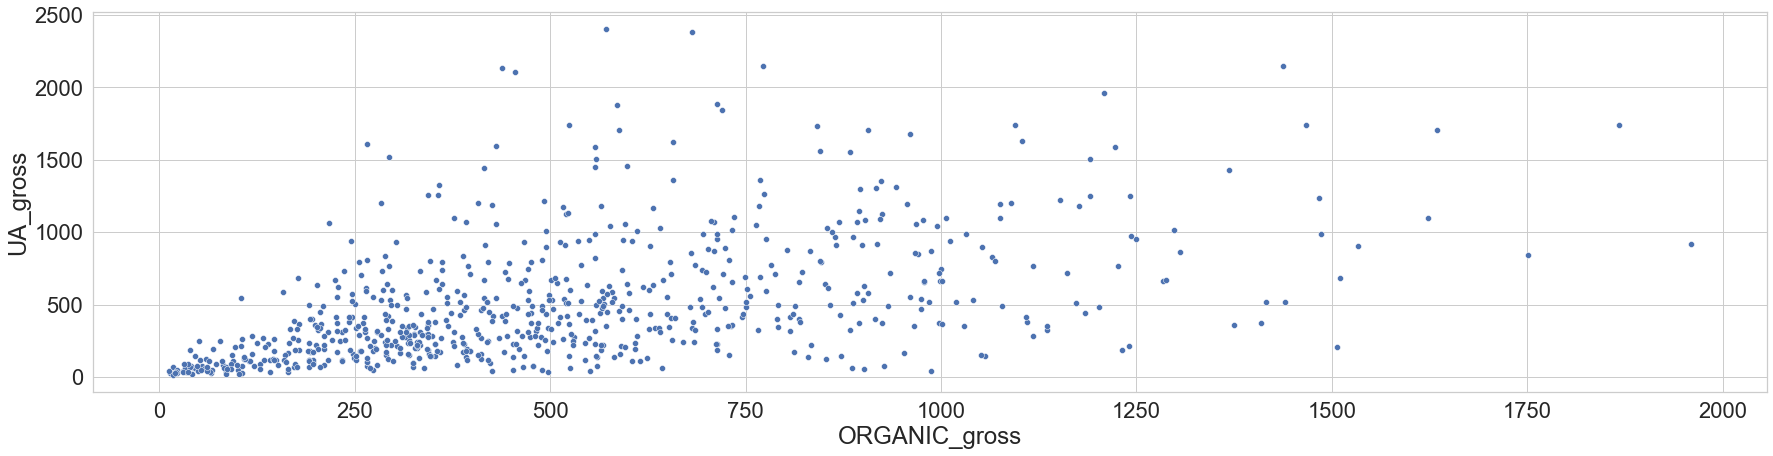

In [50]:
sns.scatterplot(data = df_gross_clean, x = df_gross_clean.ORGANIC_gross, y = df_gross_clean.UA_gross)

Выглядит намноо более собранным. Построим модель:

In [51]:
results_org_model2= smf.ols('ORGANIC_gross ~ UA_gross', df_gross_clean).fit()
print(results_org_model2.summary())

                            OLS Regression Results                            
Dep. Variable:          ORGANIC_gross   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     249.8
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           1.42e-48
Time:                        13:44:31   Log-Likelihood:                -5157.6
No. Observations:                 728   AIC:                         1.032e+04
Df Residuals:                     726   BIC:                         1.033e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    312.7392     16.615     18.822      0.0

Эта модель покрывает уже 25% диперсии, p< 0.001 k-фактор здесь равен 0.4. Дурбин-Ватсон в пределах нормы, Харке-Бера высок. Как и ожидалось, такая модель выглядит аккуратнее.

График, MSE:

In [52]:
# Create linear regression object
regr2_gross = linear_model.LinearRegression()

# Train the model using the training sets
regr2_gross.fit(df_gross_clean.UA_gross.values.reshape(-1, 1), df_gross_clean.ORGANIC_gross.values.reshape(-1, 1))

# Make predictions using the testing set
ORG_gross_pred2 = regr2_gross.predict(x_test_gross.values.reshape(-1, 1))

In [53]:
# The coefficients
print("Coefficients: \n", regr2_gross.coef_)
# The intercept
print(regr2_gross.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_gross, ORG_gross_pred2))
# The coefficient of determination
print("Coefficient of determination: %.2f" % r2_score(y_test_gross, ORG_gross_pred2))


Coefficients: 
 [[0.40124501]]
[312.73920569]
Mean squared error: 182107.12
Coefficient of determination: 0.12


MSE у этой модели больше, чем у первой. Коэффициент детерминации исходного датасета упал до 12%. Модель подходит меньше, чем первая.

In [54]:
df_full_index_cohort = df_full.set_index('cohort')
df_full_index_cohort.head(1)

ms,ORGANIC_user_cnt,UA_user_cnt,ORGANIC_gross,UA_gross
cohort,,,,
2016-01-01,3676,6061,1510,686


In [55]:
series_org_user_cnt = pd.Series(data=df_full_index_cohort['ORGANIC_user_cnt'])

Теперь можно вывести ряд самой органики.

<AxesSubplot:xlabel='cohort', ylabel='ORGANIC_user_cnt'>

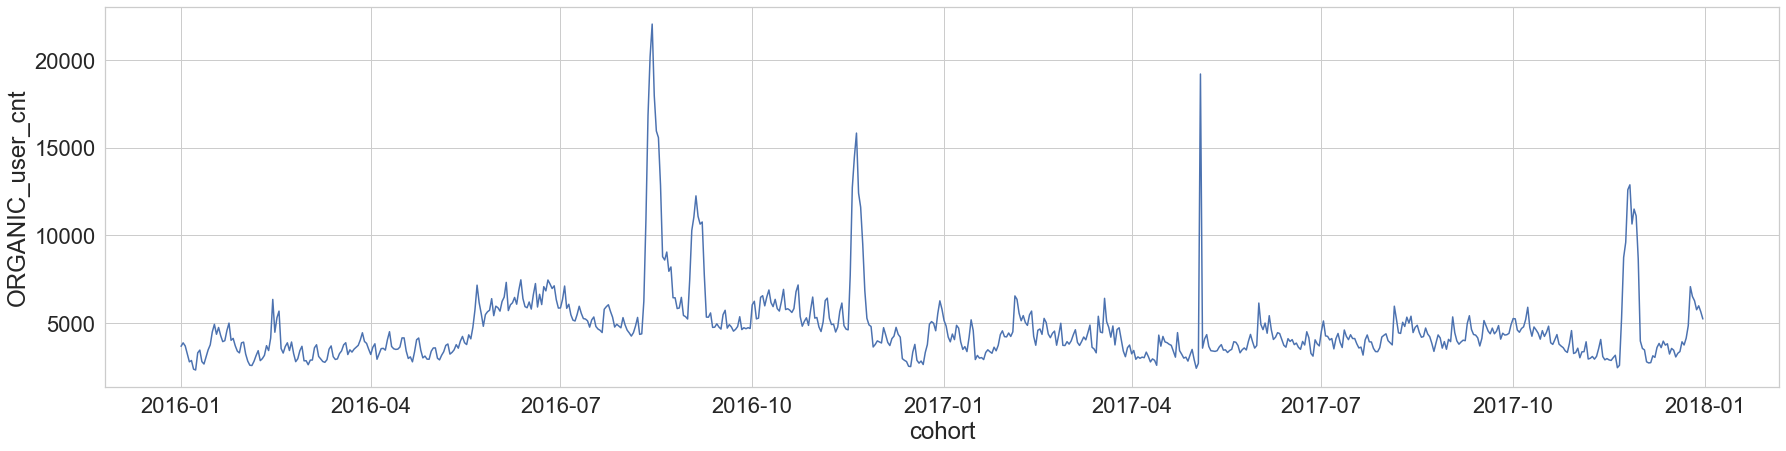

In [56]:
sns.lineplot(data = series_org_user_cnt)

Нужно посмотреть автокорреляцию. Пусть будет лаг в 30 дней.

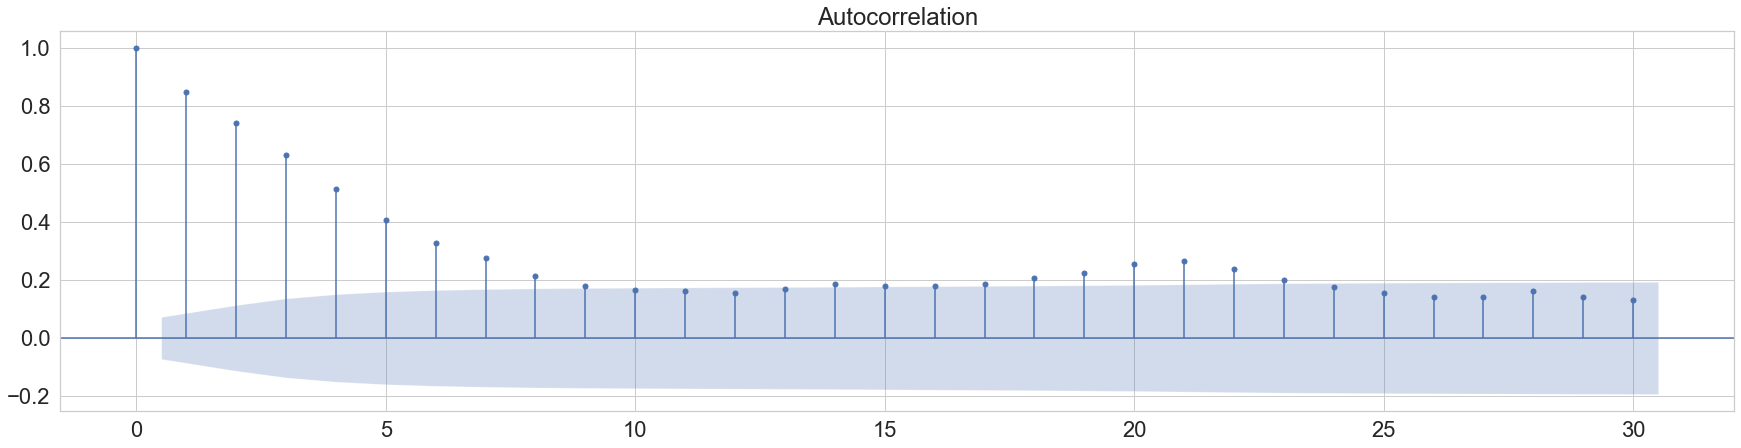

In [57]:
plot_acf(series_org_user_cnt, lags = 30);

Можно сделать вывод, что оптимальный лаг для модели равен восьми.

Для того, чтобы создать AR модель, нужно, чтобы ряд был стационарен. Органика не выглядит стационарным рядом. Применяем Критерий Дики-Фуллера:

In [58]:
result = adfuller(series_org_user_cnt, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: -3.3104596956055716
n_lags: 0.014417350930172011
p-value: 0.014417350930172011
Critial Values:
   1%, -3.439580754053961
Critial Values:
   5%, -2.865613606467485
Critial Values:
   10%, -2.568939269723711


p_value меньше 0.05, ряд не стационарен. Значит, его нужно привести к стационарному виду. Один из способов - логарифмирование.

In [59]:
series_org_user_cnt_ln = np.log(series_org_user_cnt)

<AxesSubplot:xlabel='cohort'>

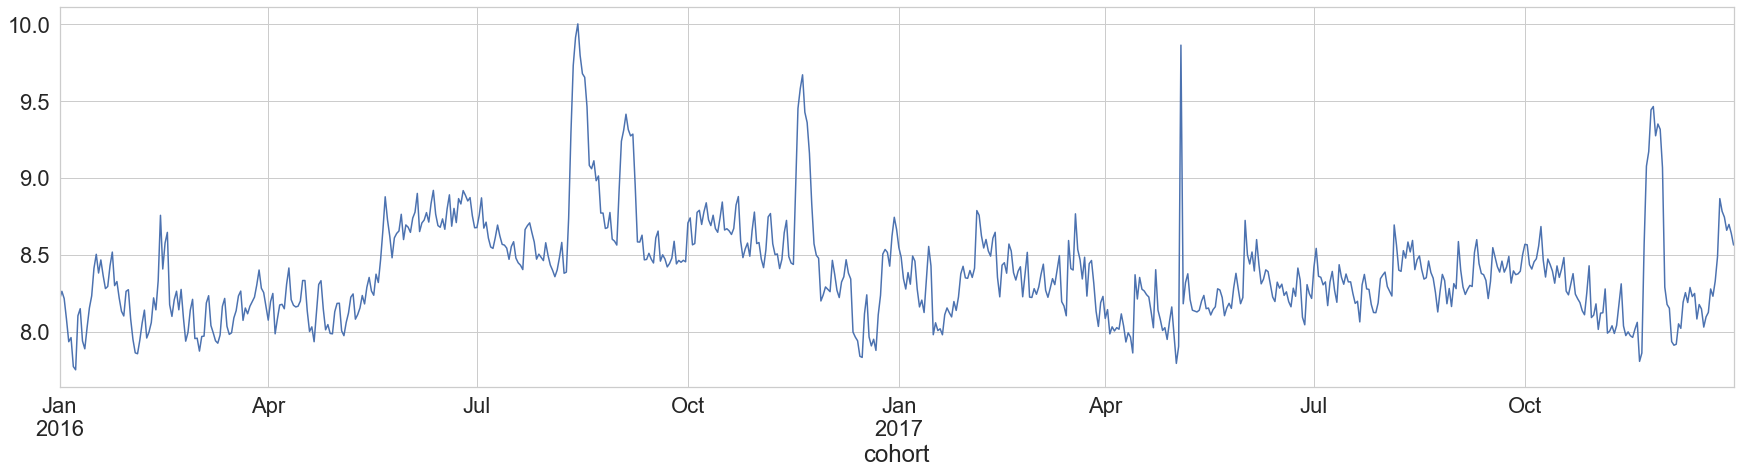

In [60]:
series_org_user_cnt_ln.plot()

Кажется, стационарным он не стал... Проверка с критерием Дики-Фуллера:

In [61]:
result = adfuller(series_org_user_cnt_ln, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: -3.0216677138233083
n_lags: 0.03291985941804007
p-value: 0.03291985941804007
Critial Values:
   1%, -3.439580754053961
Critial Values:
   5%, -2.865613606467485
Critial Values:
   10%, -2.568939269723711


Как видим, логарифмирование не сделало ряд стационарным. Попробуем преобразование Бокса-Кокса.

In [62]:
res, lmbda = stats.boxcox(series_org_user_cnt)

<AxesSubplot:>

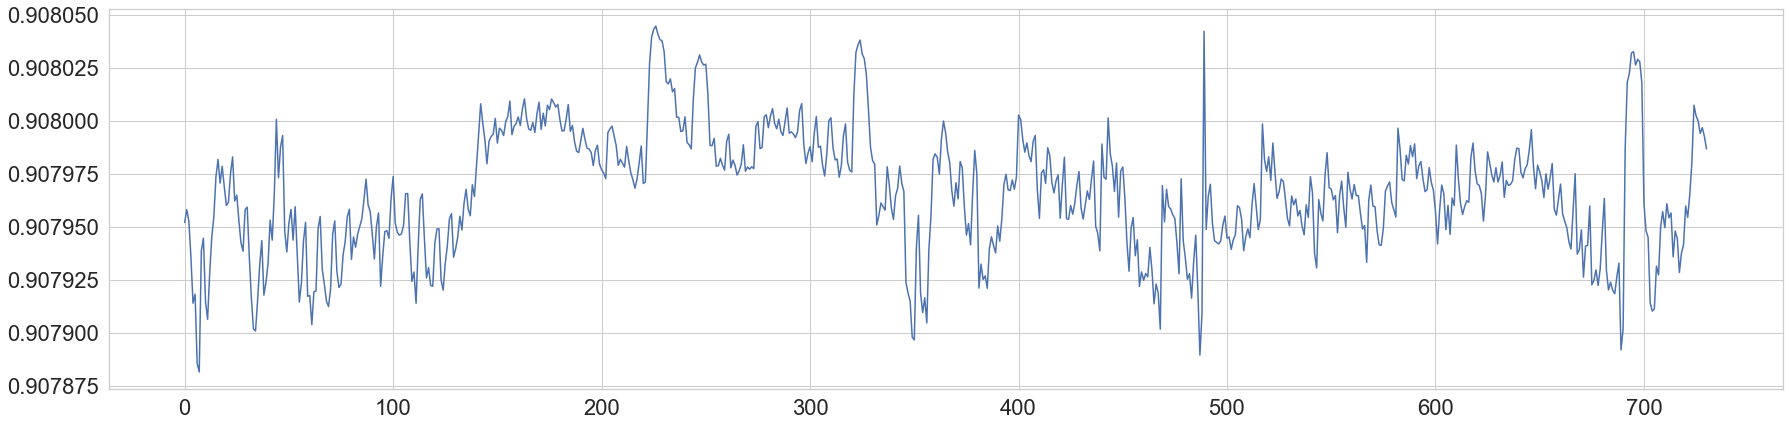

In [63]:
pd.Series(res).plot()

Выглядит более шумным, но нужно проверить снова.

In [64]:
result = adfuller(pd.Series(res), autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: -3.1039504234533126
n_lags: 0.026262217398741582
p-value: 0.026262217398741582
Critial Values:
   1%, -3.439580754053961
Critial Values:
   5%, -2.865613606467485
Critial Values:
   10%, -2.568939269723711


Преобразование тоже не помогло. Попробуем дифференциацию.

In [65]:
# difference 
def difference(data, interval):
    return [data[i] - data[i - interval] for i in range(interval, len(data))]

Дифференцирование с интервалом 1 день:

<AxesSubplot:>

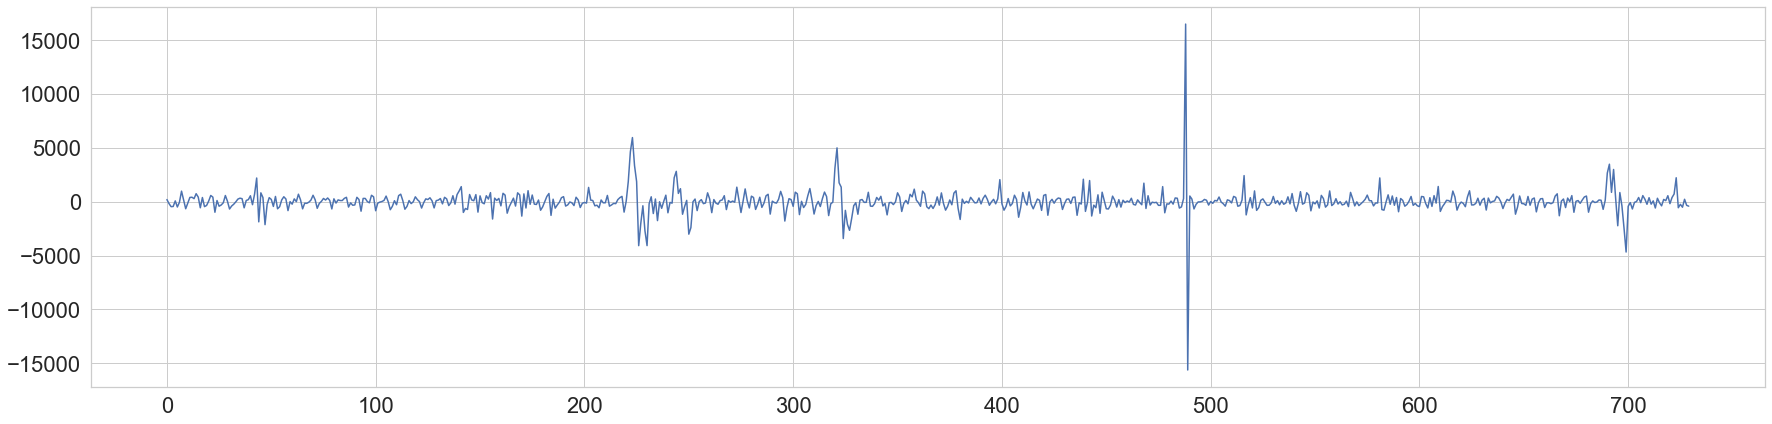

In [66]:
pd.Series(difference(series_org_user_cnt, 1)).plot()

Проверим с критерием:

In [67]:
result = adfuller(pd.Series(difference(series_org_user_cnt, 1)), autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: -8.204588545755975
n_lags: 7.080635891871037e-13
p-value: 7.080635891871037e-13
Critial Values:
   1%, -3.439606888036868
Critial Values:
   5%, -2.865625121924057
Critial Values:
   10%, -2.5689454046801052


В этом случае p-value снова меньше 0.05. Попробуем продифференцировать логарифмированный ряд.

<AxesSubplot:>

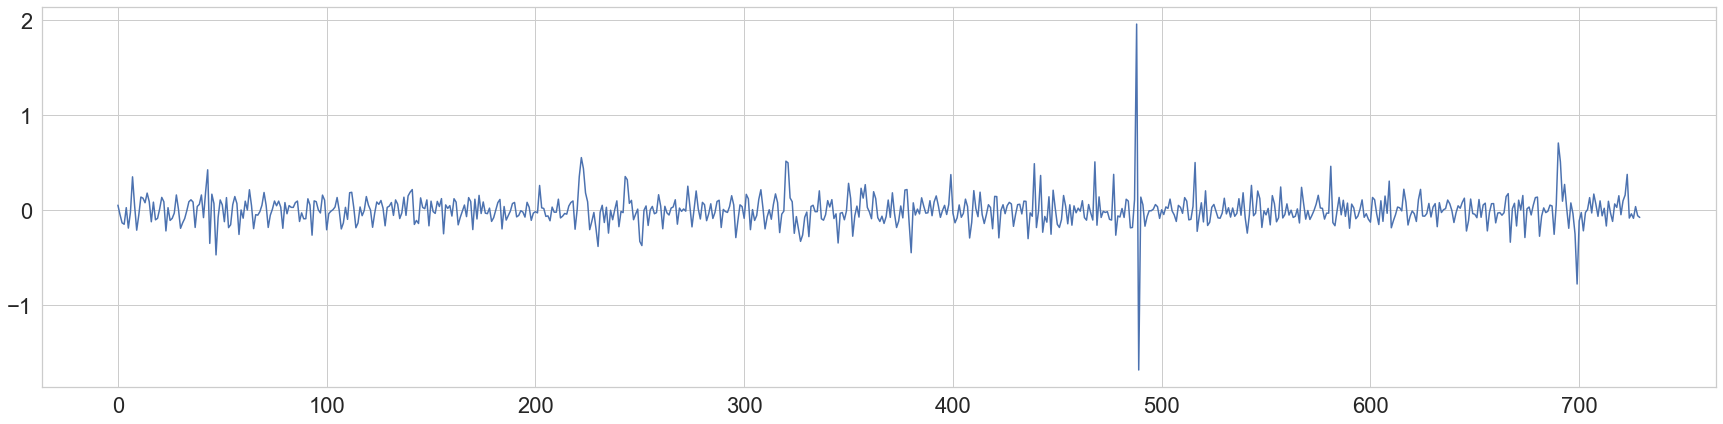

In [68]:
pd.Series(difference(series_org_user_cnt_ln, 1)).plot()

In [69]:
result = adfuller(pd.Series(difference(series_org_user_cnt_ln, 1)), autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: -8.000037357718886
n_lags: 2.3473342487546964e-12
p-value: 2.3473342487546964e-12
Critial Values:
   1%, -3.439606888036868
Critial Values:
   5%, -2.865625121924057
Critial Values:
   10%, -2.5689454046801052


Ряд всё ещё не стационарен, p-value < 0.05. Попробую продифференцировать то же самое ещё раз:

<AxesSubplot:>

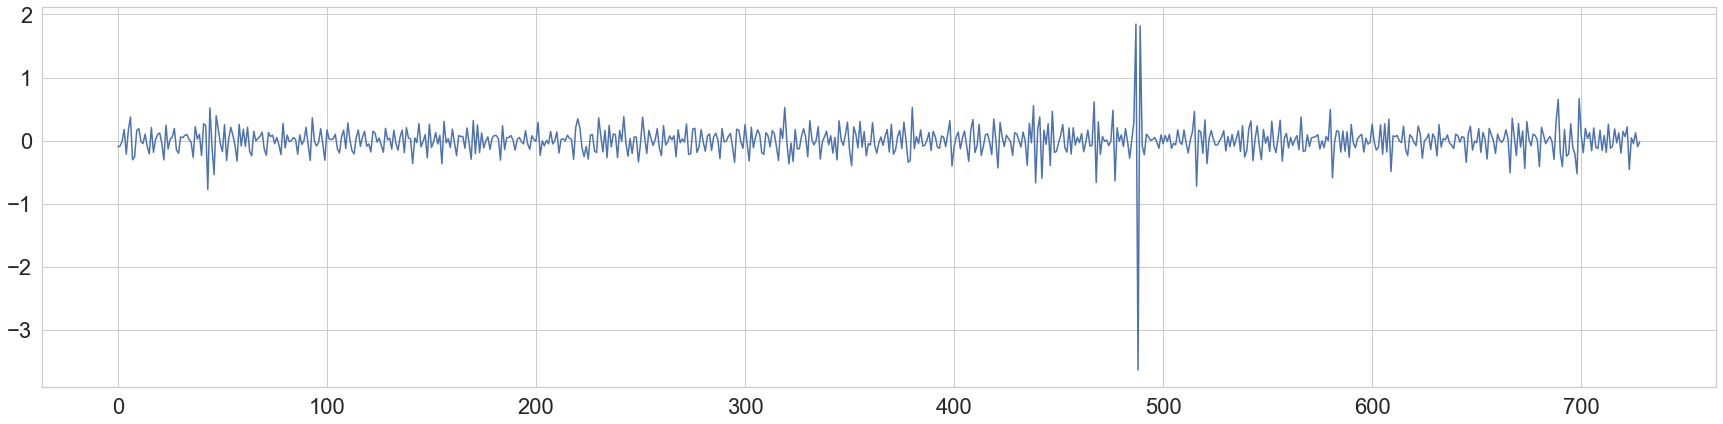

In [70]:
pd.Series(difference(difference(series_org_user_cnt_ln, 1),1)).plot()

In [71]:
result = adfuller(pd.Series(difference(difference(series_org_user_cnt_ln, 1),1)), autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: -12.974274417123299
n_lags: 3.035667203858179e-24
p-value: 3.035667203858179e-24
Critial Values:
   1%, -3.439620010600208
Critial Values:
   5%, -2.8656309041017756
Critial Values:
   10%, -2.5689484851894413


Тут я остановилась, так как ни логарифмирование, ни Бокс-Кокс, ни дифференцирование, не помогло мне привести ряд к стационарному виду

### Пересчет дохода и пользователей с учетом k-фактора

In [72]:
df_full.describe()

ms,ORGANIC_user_cnt,UA_user_cnt,ORGANIC_gross,UA_gross
count,731.000000,731.000000,731.000000,731.000000
mean,4707.459644,7695.082079,528.759234,504.846785
std,2152.880856,4884.662254,455.184716,443.059257
min,2326.000000,2085.000000,12.000000,13.000000
25%,3549.000000,4176.500000,268.000000,190.000000
50%,4222.000000,6538.000000,456.000000,377.000000
75%,5186.000000,9643.500000,711.000000,673.000000
max,22057.000000,41110.000000,8214.000000,4178.000000


Смотрю суммарные значения пользователей и доходов у UA и органики, их соотношение

In [121]:
df_full.sum()

ms
ORGANIC_user_cnt    3441153
UA_user_cnt         5625105
ORGANIC_gross        386523
UA_gross             369043
dtype: int64

Теперь я хочу поправить значения с учётом k-фактора. Для этого я создам исправленные столбцы со всеми значениями.

In [74]:
df_full_adjusted = pd.DataFrame(columns = ['adjusted_ORGANIC_user_cnt', 'adjusted_UA_user_cnt','adjusted_ORGANIC_gross', 'adjusted_UA_gross']) #дф для исправленных значений

In [75]:
df_full_adjusted #дф для исправленных значений

,adjusted_ORGANIC_user_cnt,adjusted_UA_user_cnt,adjusted_ORGANIC_gross,adjusted_UA_gross


In [76]:
round_coef_user_cnt = regr1.coef_.round(2).squeeze() # округляю и привожу коэффициент в нужный для рассчётов вид
round_coef_user_cnt

array(0.28)

In [77]:
round_coef_gross = regr1_gross.coef_.round(2).squeeze() # округляю и привожу коэффициент в нужный для рассчётов вид
round_coef_gross

array(0.36)

Считаю исправленное количество пользователей для UA и ORG: из ORG вычитаю коэффициент, к UA прибавляю.

In [78]:
adjustment_cnt =  df_full.ORGANIC_user_cnt*round_coef_user_cnt # то самое число пользователей, которое на самом деле пришло от UA

In [79]:
df_full_adjusted ['adjusted_ORGANIC_user_cnt'] = round(df_full.ORGANIC_user_cnt - adjustment_cnt) #вычитаю это число из органики
df_full_adjusted ['adjusted_UA_user_cnt'] = round(df_full.UA_user_cnt + adjustment_cnt) #прибавляю к UA

In [80]:
df_full_adjusted.head(3)

,adjusted_ORGANIC_user_cnt,adjusted_UA_user_cnt,adjusted_ORGANIC_gross,adjusted_UA_gross
0,2647.0,7090.0,NaN,NaN
1,2790.0,7627.0,NaN,NaN
2,2663.0,7296.0,NaN,NaN


То же самое для доходов:

In [81]:
adjustment_gross =  df_full.ORGANIC_gross*round_coef_gross # доход, который на самом деле пришел от UA

In [82]:
df_full_adjusted['adjusted_ORGANIC_gross'] = round(df_full.ORGANIC_gross - adjustment_gross) #вычитаю это число из органики
df_full_adjusted['adjusted_UA_gross'] = round(df_full.UA_gross + adjustment_gross) #прибавляю к UA

In [83]:
df_full_adjusted.head(3)

,adjusted_ORGANIC_user_cnt,adjusted_UA_user_cnt,adjusted_ORGANIC_gross,adjusted_UA_gross
0,2647.0,7090.0,966.0,1230.0
1,2790.0,7627.0,362.0,1382.0
2,2663.0,7296.0,272.0,1339.0


Как теперь различаются доход и количество юзеров по органике и UA?

Суммарные значения

In [98]:
df_full_adjusted.sum()

adjusted_ORGANIC_user_cnt    2477630.0
adjusted_UA_user_cnt         6588628.0
adjusted_ORGANIC_gross        247365.0
adjusted_UA_gross             508201.0
dtype: float64

Сравнение средних по пользователям:

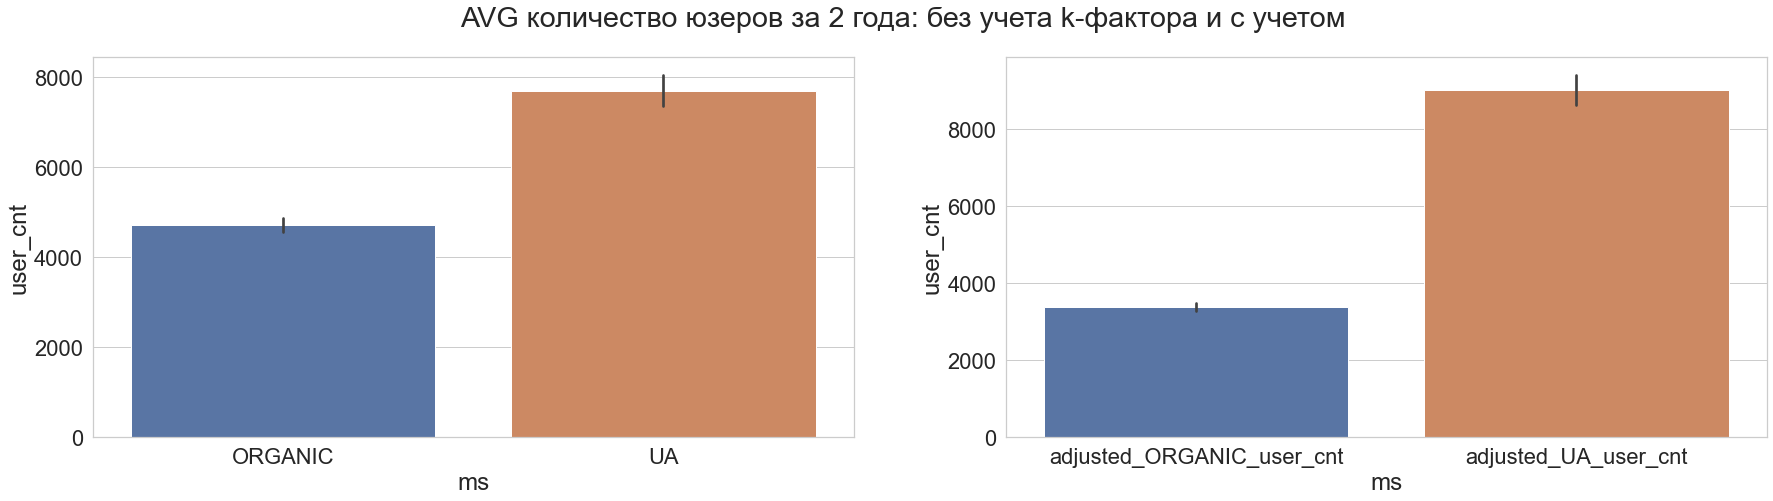

In [145]:
f, axes = plt.subplots(1, 2)
sns.barplot(data = df, x = 'ms', y='user_cnt', estimator= np.mean , ax=axes[0])
sns.barplot(data= df_full_adjusted
            .drop(columns = ['adjusted_ORGANIC_gross','adjusted_UA_gross']) #привожу данные в нужный вид для sns
            .melt(var_name="ms",value_name='user_cnt'), x='ms', y='user_cnt', ax=axes[1])
plt.suptitle("AVG количество юзеров за 2 года: без учета k-фактора и с учетом")
plt.show()

Разница между средними увеличилась: статистически значимо UA пользователей больше, чем органических.

То же самое можно проверить с помощью критерия Стьюдента(несмотря на то, что признаки не распределены нормально: на практике чаще всего это допущение игнорируется)

In [86]:
stats.ttest_ind(df_full_adjusted.adjusted_ORGANIC_user_cnt, df_full_adjusted.adjusted_UA_user_cnt, equal_var = True)

Ttest_indResult(statistic=-27.59133797396096, pvalue=3.2251207939978054e-135)

Конкретные значения средних count:

In [87]:
adjusted_ORGANIC_user_cnt_AVG = round(df_full_adjusted.adjusted_ORGANIC_user_cnt.mean())
adjusted_UA_user_cnt_AVG =round(df_full_adjusted.adjusted_UA_user_cnt.mean())
print('adjusted_ORGANIC_user_cnt_AVG =' ,adjusted_ORGANIC_user_cnt_AVG)
print('adjusted_UA_user_cnt_AVG =' ,adjusted_UA_user_cnt_AVG)

adjusted_ORGANIC_user_cnt_AVG = 3389
adjusted_UA_user_cnt_AVG = 9013


Теперь то же самое, но для доходов: здесь интереснее, так как до учёта k-фактора их доверительные интервалы пересекались

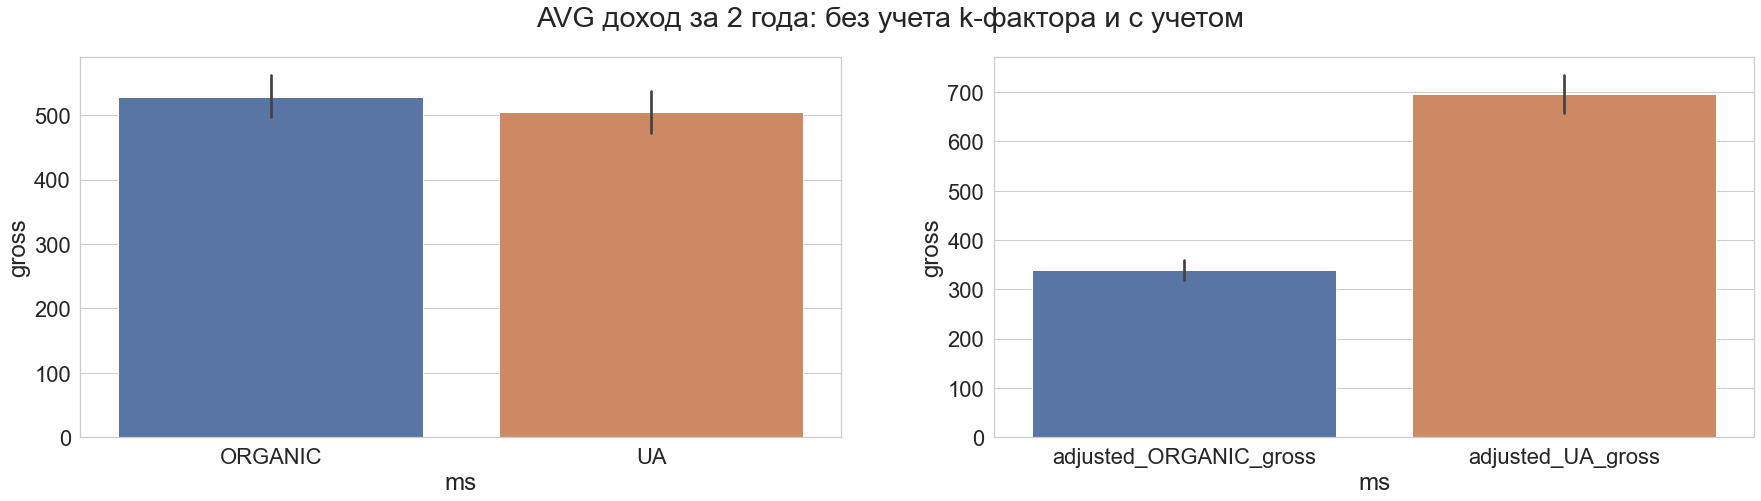

In [88]:
f, axes = plt.subplots(1, 2)
sns.barplot(data = df, x = 'ms', y='gross', estimator= np.mean , ax=axes[0])
sns.barplot(data= df_full_adjusted
            .drop(columns = ['adjusted_ORGANIC_user_cnt','adjusted_UA_user_cnt']) #привожу данные в нужный вид для sns
            .melt(var_name="ms",value_name='gross'), x='ms', y='gross', ax=axes[1])
plt.suptitle("AVG доход за 2 года: без учета k-фактора и с учетом")
plt.show()

Теперь видно, что с учётом k-фактора статистически значимая разница между средними по доходу у UA и органики есть: доход с UA статистически значимо выше.

То же самое можно проверить с помощью критерия Стьюдента(несмотря на то, что признаки не распределены нормально: на практике чаще всего это допущение игнорируется)

In [89]:
stats.ttest_ind(df_full_adjusted.adjusted_ORGANIC_gross, df_full_adjusted.adjusted_UA_gross, equal_var = True)

Ttest_indResult(statistic=-16.105360052645853, pvalue=7.662745510031888e-54)

Конкретные значения средних gross:

In [90]:
adjusted_ORGANIC_gross_AVG = round(df_full_adjusted.adjusted_ORGANIC_gross.mean())
adjusted_UA_gross_AVG =round(df_full_adjusted.adjusted_UA_gross.mean())
print('adjusted_ORGANIC_gross_AVG =' ,adjusted_ORGANIC_gross_AVG)
print('adjusted_UA_gross_AVG =' ,adjusted_UA_gross_AVG)

adjusted_ORGANIC_gross_AVG = 338
adjusted_UA_gross_AVG = 695


Этот график для исследовательских целей, свои мысли отразила в презентации.

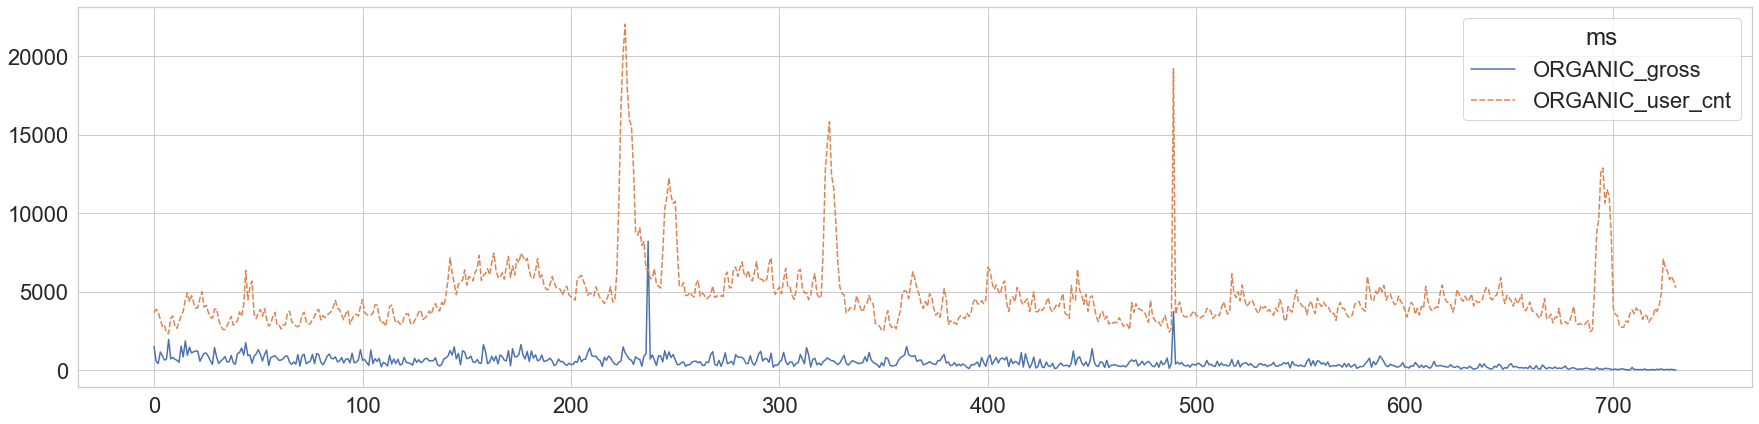

In [96]:
sns.lineplot(data = df_full[['cohort', 'ORGANIC_gross','ORGANIC_user_cnt']].sort_values(by =['ORGANIC_gross','ORGANIC_user_cnt'], ascending = False ))
plt.savefig('Органика доход и юзеркаунт.png')